No of process= 5 No of Devices= 34 No of Drones= 5 Process Group= [[1], [2], [3], [4], [5]]

[1.0, 1.0, 1.0, 1.0, 1.0]
GA :: Iteration 0: Best Cost is = 0.16549201504363328
GA :: Iteration 1: Best Cost is = 0.16549201504363328
GA :: Iteration 2: Best Cost is = 0.14913816541381625
GA :: Iteration 3: Best Cost is = 0.13150004163507295
GA :: Iteration 4: Best Cost is = 0.1296641098700716
GA :: Iteration 5: Best Cost is = 0.1296641098700716
GA :: Iteration 6: Best Cost is = 0.11262607191609031
GA :: Iteration 7: Best Cost is = 0.0883910689694947
GA :: Iteration 8: Best Cost is = 0.0883910689694947
GA :: Iteration 9: Best Cost is = 0.0883910689694947
GA :: Iteration 10: Best Cost is = 0.0883910689694947
GA :: Iteration 11: Best Cost is = 0.0883910689694947
GA :: Iteration 12: Best Cost is = 0.059119828637551566
GA :: Iteration 13: Best Cost is = 0.059119828637551566
GA :: Iteration 14: Best Cost is = 0.008961859871893315
GA :: Iteration 15: Best Cost is = 0.008961859871893315
GA :: Iteratio

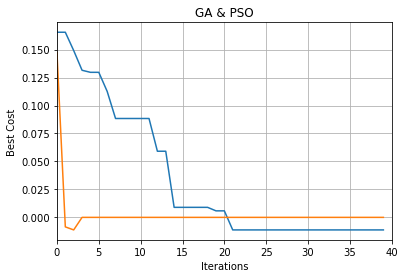

GA :: Iteration 0: Best Cost is = 0.3127219064435956
GA :: Iteration 1: Best Cost is = 0.3127219064435956
GA :: Iteration 2: Best Cost is = 0.3022361917073861
GA :: Iteration 3: Best Cost is = 0.3022361917073861
GA :: Iteration 4: Best Cost is = 0.2714855520113704
GA :: Iteration 5: Best Cost is = 0.2548827740651696
GA :: Iteration 6: Best Cost is = 0.2548827740651696
GA :: Iteration 7: Best Cost is = 0.2548827740651696
GA :: Iteration 8: Best Cost is = 0.2548827740651696
GA :: Iteration 9: Best Cost is = 0.24662465940452952
GA :: Iteration 10: Best Cost is = 0.24662465940452952
GA :: Iteration 11: Best Cost is = 0.24248813180198256
GA :: Iteration 12: Best Cost is = 0.22694702073030848
GA :: Iteration 13: Best Cost is = 0.22694702073030848
GA :: Iteration 14: Best Cost is = 0.21771415274453404
GA :: Iteration 15: Best Cost is = 0.21771415274453404
GA :: Iteration 16: Best Cost is = 0.20600178145523293
GA :: Iteration 17: Best Cost is = 0.20600178145523293
GA :: Iteration 18: Best Cost

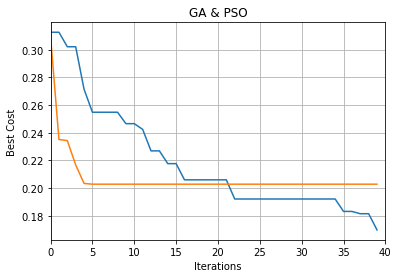

GA :: Iteration 0: Best Cost is = 0.2890596535638684
GA :: Iteration 1: Best Cost is = 0.27489289144412066
GA :: Iteration 2: Best Cost is = 0.26197055079029524
GA :: Iteration 3: Best Cost is = 0.2615707449791457
GA :: Iteration 4: Best Cost is = 0.2246773321213728
GA :: Iteration 5: Best Cost is = 0.16360029584795568
GA :: Iteration 6: Best Cost is = 0.16360029584795568
GA :: Iteration 7: Best Cost is = 0.16360029584795568
GA :: Iteration 8: Best Cost is = 0.16360029584795568
GA :: Iteration 9: Best Cost is = 0.16360029584795568
GA :: Iteration 10: Best Cost is = 0.1623143515385658
GA :: Iteration 11: Best Cost is = 0.1623143515385658
GA :: Iteration 12: Best Cost is = 0.1623143515385658
GA :: Iteration 13: Best Cost is = 0.1623143515385658
GA :: Iteration 14: Best Cost is = 0.1623143515385658
GA :: Iteration 15: Best Cost is = 0.1623143515385658
GA :: Iteration 16: Best Cost is = 0.1623143515385658
GA :: Iteration 17: Best Cost is = 0.1623143515385658
GA :: Iteration 18: Best Cost i

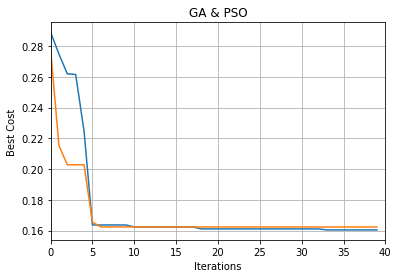

GA :: Iteration 0: Best Cost is = 0.09948828571252628
GA :: Iteration 1: Best Cost is = 0.09948828571252628
GA :: Iteration 2: Best Cost is = 0.09948828571252628
GA :: Iteration 3: Best Cost is = 0.09948828571252628
GA :: Iteration 4: Best Cost is = 0.09948828571252628
GA :: Iteration 5: Best Cost is = 0.09948828571252628
GA :: Iteration 6: Best Cost is = 0.0659227968578468
GA :: Iteration 7: Best Cost is = 0.06485762589777759
GA :: Iteration 8: Best Cost is = 0.06485762589777759
GA :: Iteration 9: Best Cost is = 0.043048564537583614
GA :: Iteration 10: Best Cost is = 0.043048564537583614
GA :: Iteration 11: Best Cost is = 0.043048564537583614
GA :: Iteration 12: Best Cost is = 0.043048564537583614
GA :: Iteration 13: Best Cost is = 0.043048564537583614
GA :: Iteration 14: Best Cost is = 0.02312365139376766
GA :: Iteration 15: Best Cost is = 0.02312365139376766
GA :: Iteration 16: Best Cost is = 0.02312365139376766
GA :: Iteration 17: Best Cost is = 0.02312365139376766
GA :: Iteration 

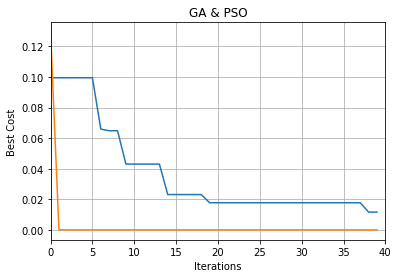

GA :: Iteration 0: Best Cost is = 0.031059904119687568
GA :: Iteration 1: Best Cost is = 0.031059904119687568
GA :: Iteration 2: Best Cost is = 0.031059904119687568
GA :: Iteration 3: Best Cost is = 0.031059904119687568
GA :: Iteration 4: Best Cost is = 0.031059904119687568
GA :: Iteration 5: Best Cost is = 0.031059904119687568
GA :: Iteration 6: Best Cost is = 0.031059904119687568
GA :: Iteration 7: Best Cost is = 0.031059904119687568
GA :: Iteration 8: Best Cost is = 0.031059904119687568
GA :: Iteration 9: Best Cost is = -0.004359569257791425
GA :: Iteration 10: Best Cost is = -0.004359569257791425
GA :: Iteration 11: Best Cost is = -0.004359569257791425
GA :: Iteration 12: Best Cost is = -0.004359569257791425
GA :: Iteration 13: Best Cost is = -0.004359569257791425
GA :: Iteration 14: Best Cost is = -0.004359569257791425
GA :: Iteration 15: Best Cost is = -0.004359569257791425
GA :: Iteration 16: Best Cost is = -0.004359569257791425
GA :: Iteration 17: Best Cost is = -0.004359569257

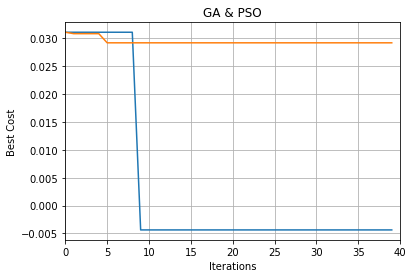

No of process= 5 No of Devices= 34 No of Drones= 5 Process Group= [[1], [2], [3], [4], [5]]
GA :: Average COAOI =  0.06524651627280861
GA :: Number of times Data Collected =  46
GA :: Total Data Collected =  230.0  KByte
GA :: Convergence Iteration number  148
GA :: Elaped Time  673.73
Total number of Rows written    198


<ipython-input-3-8c2c13213081>:37: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet = book.get_sheet_by_name('GA')


saved
PSO :: Average COAOI =  0.07662528351625511
PSO :: Number of times Data Collected =  52
PSO :: Total Data Collected =  260.0  KByte
PSO :: Convergence Iteration number  94
PSO :: Elaped Time  450.48 -  9.96295976638794 =  440.5170402336121
Total number of Rows written    199


<ipython-input-3-8c2c13213081>:88: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet = book.get_sheet_by_name('PSO')


saved


In [3]:
                     ########### VERSION 1   ################### Try to Fix T(time to collect responses) 
                                                                  #and to do that we need to asidjust Chromosome size for ngle, multi drone approach  3 process 12 devices



import matplotlib.pyplot as plt
import random
import math
import numpy as np
from ypstruct import structure
import collections

from xlwt import Workbook
from  xlrd import open_workbook
import openpyxl
from random import *
import random
import sys


############# Helping Functions ####################################
def writeToExcelFile(costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga):
    #define the variables
    rowCount=0
    columnNumber=0
    wb = open_workbook('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    ws = wb.sheet_by_index(0) 
    rowCount = ws.nrows
    rowCount+=1
    columnNumber=1    
    print("Total number of Rows written   ",rowCount)
    writedata(rowCount,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga)

#Data to specified cells.
def writedata(rowNumber,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga):
    book = openpyxl.load_workbook('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    sheet = book.get_sheet_by_name('GA')
    sheet.cell(row=rowNumber, column=1).value = no_drones
    sheet.cell(row=rowNumber, column=2).value = no_process
    sheet.cell(row=rowNumber, column=3).value = no_devices
    sheet.cell(row=rowNumber, column=4).value = PlayTime
    
    sheet.cell(row=rowNumber, column=5).value = problem.T
    sheet.cell(row=rowNumber, column=6).value = params.npop
    sheet.cell(row=rowNumber, column=7).value = params.maxit
    k=8
    for i in range(0,no_drones):
        sheet.cell(row=rowNumber, column=k).value = costofprocess[i]
        k=k+1
        
        
    for i in range(0,5-no_drones):
        sheet.cell(row=rowNumber, column=k).value = .000000000001
        k=k+1
        
    sheet.cell(row=rowNumber, column=13).value = totalcost
    sheet.cell(row=rowNumber, column=14).value = EtaS
    sheet.cell(row=rowNumber, column=15).value = EtaT
    sheet.cell(row=rowNumber, column=16).value = RohS
    sheet.cell(row=rowNumber, column=17).value = RohT
    sheet.cell(row=rowNumber, column=18).value = TotalDataCollected
    sheet.cell(row=rowNumber, column=19).value = TotalDataCollected*2560/1024 * 2 # Expressed in KByte= 2560 Byte for 2 Sec
    sheet.cell(row=rowNumber, column=20).value = convergega
    sheet.cell(row=rowNumber, column=21).value = avgtimeelapedga
    
   
    
    book.save('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    print('saved')

############################################################################################################

def writeToExcelFile2(costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergepso,avgtimeelapedpso):
    #define the variables
    rowCount=0
    columnNumber=0
    wb = open_workbook('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    ws = wb.sheet_by_index(0) 
    rowCount = ws.nrows
    rowCount+=1
    columnNumber=1    
    print("Total number of Rows written   ",rowCount)
    writedata2(rowCount,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergepso,avgtimeelapedpso)

#Data to specified cells.
def writedata2(rowNumber,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergepso,avgtimeelapedpso):
    book = openpyxl.load_workbook('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    sheet = book.get_sheet_by_name('PSO')
    sheet.cell(row=rowNumber, column=1).value = no_drones
    sheet.cell(row=rowNumber, column=2).value = no_process
    sheet.cell(row=rowNumber, column=3).value = no_devices
    sheet.cell(row=rowNumber, column=4).value = PlayTime
    
    sheet.cell(row=rowNumber, column=5).value = problem.T
    sheet.cell(row=rowNumber, column=6).value = params.npop
    sheet.cell(row=rowNumber, column=7).value = params.maxit
    k=8
    for i in range(0,no_drones):
        sheet.cell(row=rowNumber, column=k).value = costofprocess[i]
        k=k+1
        
        
    for i in range(0,5-no_drones):
        sheet.cell(row=rowNumber, column=k).value = .000000000001
        k=k+1
        
    sheet.cell(row=rowNumber, column=13).value = totalcost
    sheet.cell(row=rowNumber, column=14).value = EtaS
    sheet.cell(row=rowNumber, column=15).value = EtaT
    sheet.cell(row=rowNumber, column=16).value = RohS
    sheet.cell(row=rowNumber, column=17).value = RohT
    sheet.cell(row=rowNumber, column=18).value = TotalDataCollected
    sheet.cell(row=rowNumber, column=19).value = TotalDataCollected*2560/1024 * 2 # Expressed in KByte= 2560 Byte for 2 Sec
    sheet.cell(row=rowNumber, column=20).value = convergepso
    sheet.cell(row=rowNumber, column=21).value = avgtimeelapedpso
    
  
    book.save('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    print('saved')



def distribute(numbers, n):
    quotient, remainder = divmod(len(numbers), n)
    result = [numbers[i * quotient + min(i, remainder):(i + 1) * quotient + min(i + 1, remainder)] for i in range(n)]
    return result

def crossover(parent1, parent2, gamma=0.1):  
    c1=parent1.deepcopy()
    c2=parent2.deepcopy()
    
    p1=c1.position.tolist()
    p2=c2.position.tolist()
    
    for i in range(1,random.randint(2,3)): #number of times you want to do crossover
        
        # select crossover point
        crossover_point = random.randint(1, len(parent1.position) - 1)
    
        # create offspring solution
        c1.position = np.array(p1[:crossover_point] + p2[crossover_point:])
        c2.position = np.array(p2[:crossover_point] + p1[crossover_point:])
        p1=c1.position.tolist()
        p2=c2.position.tolist()
    
    return c1, c2

def mutate2(x, mu):
    y=x.deepcopy()
    count=0
    for swaping_p in range(len(y.position)):
        if(random.random() < mu):
            swapedWith = np.random.randint(0,len(y.position))
            temp1=y.position[swaping_p]
            temp2=y.position[swapedWith]
            y.position[swapedWith]=temp1
            y.position[swaping_p]=temp2
            count=count+1

    return y


def roulette_wheel_selection(p):
    c = np.cumsum(p)
    r = sum(p)*np.random.rand()
    ind = np.argwhere(r <= c)
    return ind[0][0]

def findmindistance(frame,v, allindex,distancematrix):
    L=len(allindex)
    devices=[]
    v1=int(frame[v].device[1:])-1
    
    for j in range(v-1, 0, -1) :
        v2=int(frame[j].device[1:])-1
        
        d=distancematrix[v1][v2]
#         print('v1=',v1,'v2=',v2,'dis ',d)
        devices.append(d)
    if len(devices)>0:
        m=min(devices)
    else:
        m=0
#     print('min=',m)
    return m


def distribute_random_numbers(n):
    # generate n random numbers
    nums = [random.random() for i in range(n)]
    # calculate sum
    nums_sum = sum(nums)
    # normalize the numbers
    nums = [num/nums_sum for num in nums]
    return nums


def makedistancematrix(devloc):
    #devloc={'n1': (253, 434), 'n2': (200, 368), 'n3': (76, 372),'n4': (100, 500),'n5': (173, 635), 'n6': (167, 676),'n7': (451, 687),'n8': (240, 643),'n9': (467, 620), 'n10': (474, 709), 'n11': (505, 594),'n12': (458, 494)}
    #Structure of device location
    dismat=[]
    for i in range(1,no_devices+1):

        temp=[]
        device1="n"+str(i)
        node1=devloc[device1]

        for j in range(1,no_devices+1):

            if i !=j:
                device2="n"+str(j)
                node2=devloc[device2]
                distance=math.dist(node1,node2)
            else:
                distance=0.0
            
            temp.append(distance)

        dismat.append(temp)


    return dismat

def count_consecutive_sequences(lst):
    count = 1
    num_sequences = 0
    current_elem = lst[0]

    for elem in lst[1:]:
        if elem == current_elem:
            count += 1
        else:
            current_elem = elem
            if count > 1:
                num_sequences += 1
            count = 1

    if count > 1:
        num_sequences += 1

    return num_sequences


def findtimedifference(v,frame,allindex):
    currentdevice=frame[v].device
    td=1
    if v-1 <0:
        return td
    for k in range(v-1, 0, -1) :
        loc=allindex[k]
        if frame[loc].device == currentdevice:
            td=frame[v].timestamp - frame[loc].timestamp
            break
    
    return td
            
    
def confirmnorepeat(L, avllist):
    #print("LLLLLL",L)
   
    for ind in range(len(L)-1):
        f=L[ind]
        s=L[ind+1]
        
        if f==s:
            while True:
                ch=random.choice(avllist)
                if ch!=f:
                    break
            
        
            L[ind+1]=ch

    return (L)
    
    
def CalculateMLambda(n):
    # generate n random numbers
    #nums = [random.random() for i in range(n)]
    nums = [random.uniform(0.28, 0.40) for i in range(n)]
    # calculate sum
    nums_sum = sum(nums)
    # normalize the numbers
    nums = [num/nums_sum for num in nums]
    return nums    
    

def generateDeviceLocation(no_devices):
    devlocation={}
    point_history=[]
    for i in range(1,no_devices+1):
        node=str("n"+str(i))
        #print(node)
        while True:
            pntX=randint(1, 1000)
            pntY=randint(1, 1000)
            if (pntX,pntY) not in point_history:
                point_history.append((pntX,pntY))
                devlocation[node]=(pntX,pntY)
                break
    return devlocation

def doDeviceProcessMapping(no_process,no_devices):
    numbers = [i for i in range(1,no_devices+1)]
    #random.shuffle(numbers)
    all_dist_p = distribute(numbers, no_process)
    i=1
    pdmap2={}
    for fr in all_dist_p:
        pr=str("p"+str(i))
        i=i+1
        for nd in fr:
            node=str("n"+str(nd))
            pdmap2[node]=pr
    
    return pdmap2




def findTotalDataGathered(frame,PlayTime):
    count=0
    for i in range(0,len(frame)):
        if frame[i].timestamp <= PlayTime:
            count=count+1
    
    return count
            
def findPositionLocation(position,devicelocation):
    
    PL=[]
    for p in position:
        val=devicelocation[p]
        PL.append(float(val[0]))
        PL.append(float(val[1]))
    return PL
    
    
def findNearestDevice(positionlocation, devicelocation,sets):
    dic={}
    pos=[]
    k=0
        
    l=len(positionlocation)
#     print(l)
    for i in range(0,l-1,2):
        x=positionlocation[i]
        y=positionlocation[i+1]
#         print(x,y)
        for nd in sets:
            dist = math.dist((x, y), devicelocation[nd])
            dic[nd]=dist
#             print(dist)
            
#         print(dic)
        sorted_dic = dict(sorted(dic.items(), key=lambda x: x[1]))
        first_key, first_value = next(iter(sorted_dic.items()))
        iterator = iter(sorted_dic.items())

        # Skip the first element
        next(iterator)

        # Retrieve the second element
        second_key, second_value = next(iterator)
#         print(sorted_dic)
#         print(first_key, first_value)
#         print(second_key, second_value)
        
        if k==0:
            pos.append(first_key)
        else:
            lpos=len(pos)
            if pos[lpos-1]==first_key:
                pos.append(second_key)
            else:
                pos.append(first_key)
        k=k+1
#     print(pos)
    return pos
        
        
# Start measuring time elapsed
def tic():
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

# End mesuring time elapsed
def toc():
    import time, math
    if 'startTime_for_tictoc' in globals():
        dt = math.floor(100*(time.time() - startTime_for_tictoc))/100.
        print('Elapsed time is {} second(s).'.format(dt))
        return dt
    else:
        print('Start time not set. You should call tic before toc.')    
        

def count_same_values_from_right(lst):
    count = 0
    last_element = lst[-1]

    # Iterate through the list from right to left
    for i in range(len(lst) - 1, -1, -1):
        if lst[i] == last_element:
            count += 1
        else:
            break

    return count  
    
    
    

############# Helping Functions End ####################################


###############################################################################
#             PSO Algorithm starts
###############################################################################

def PSOrun(problem, params,d,initialpop,ga_aoi):
    import time
    extra_time=0
    # Problem Information
    costfunc = problem.costfunc
    nvar = problem.nvar               #particle's size
    nVar=nvar
    no_process=problem.no_process     # No of process
    no_devices=problem.no_devices     # No of devices that monoitors all process
    pdmap=problem.pdmap               # Device to Process mapping {'n1':p1, 'n2':p2, ....}
    dismat=problem.distancematrix     # Distance matrix(device X device) which holds distances
    devicelocation=problem.devicelocation 

    allsets=problem.allsets #Set of nodes assigned to drones [[3,5,9],[8,1,2]]  3,5,9 nodes is assigned to drone 1

    #BufferTime BT
    BT=1

    # Parameters
    maxit = params.MaxIter
    npop = params.PopSize
    c1 = params.c1
    c2 = params.c2
    w = params.w
    wdamp = params.wdamp
    wmax=.9
    wmin=.4
    c1max=c1
    c1min=1.5
    c2max=c2
    c2min=1.5
    
    

    # Empty Individual Particle Template
    
    empty_individual = structure()
    empty_individual.position = None
    empty_individual.positionlocation = None
    empty_individual.velocity = None
    empty_individual.cost = None
    empty_individual.dataCollected=None
    empty_individual.best_position=None
    empty_individual.best_positionlocation=None
    empty_individual.best_cost=None

#     Best Solution Ever Found
    bestsol = empty_individual.deepcopy()
    bestsol.cost = np.inf

    # Initialize Best Solution Ever Found
    gbest = empty_individual.deepcopy()
    gbest.position = None
    gbest.positionlocation = None
    gbest.cost = np.inf

    # Create Initial Population
    pop = empty_individual.repeat(npop)
    
    for i in range(npop):
#         pos=[]
#         for k in range(1,nvar+1):
#             pos.append(random.choice(allsets[d]))
          
#         pos=confirmnorepeat(pos,allsets[d])
#         pop[i].position = np.array(pos)
        pop[i].position=initialpop[i].position
    
        posloc=findPositionLocation(pop[i].position,devicelocation)
        
        pop[i].positionlocation=np.array(posloc)
        
        pop[i].velocity = np.zeros(nvar*2)
        
        RV = costfunc(pop[i].position)
        pop[i].cost = RV.costvalue
        pop[i].dataCollected=nvar-RV.dataignored
        
        
        pop[i].best_position = pop[i].position.copy()
        pop[i].best_positionlocation = pop[i].positionlocation.copy()
        pop[i].best_cost = pop[i].cost
        
        if pop[i].best_cost < gbest.cost:
            gbest.position = pop[i].best_position.copy()
            gbest.positionlocation = pop[i].best_positionlocation.copy()
            gbest.cost = pop[i].best_cost
    
    
    # To store Best Cost of all Iterations
    maxit=maxit*1
    bestcost = np.empty(maxit)
    
    
    
    # PSO Loop
    for it in range(0, maxit):
        for i in range(0, npop):
            
#             pop[i].velocity = w*pop[i].velocity \
#                 + c1*np.random.rand(nVar)*(pop[i].best_position - pop[i].position) \
#                 + c2*np.random.rand(nVar)*(gbest.position - pop[i].position)
            
            pop[i].velocity = w*pop[i].velocity \
                + c1*np.random.rand(nVar*2)*(pop[i].best_positionlocation - pop[i].positionlocation) \
                + c2*np.random.rand(nVar*2)*(gbest.positionlocation - pop[i].positionlocation)


            c1=c1max-((c1max-c1min)/maxit)*it
            c2=c2min+((c2max-c2min)/maxit)*it
            
            
            pop[i].positionlocation += pop[i].velocity
#             pop[i].positionlocation = np.maximum(pop[i].positionlocation, varmin)
#             pop[i].positionlocation = np.minimum(pop[i].positionlocation, varmax)
            
            
            start_time1 = time.time()
            pos=findNearestDevice(pop[i].positionlocation, devicelocation,allsets[d])
            pop[i].position=np.array(pos)
            
            #Added these lines to test { Starts
            posloc=findPositionLocation(pop[i].position,devicelocation)
            pop[i].positionlocation=np.array(posloc)
            #Added these lines to test } Ends
            end_time1 = time.time()
            time_difference1 = end_time1 - start_time1
            extra_time=extra_time+time_difference1
            
            # Added to test mutation in PSO
#             mu1 = mutate2(pop[i], .2)
#             mu1.position=confirmnorepeat(mu1.position,allsets[d])
#             pop[i].position=mu1.position
                
            
            RV = costfunc(pop[i].position)
            pop[i].cost = RV.costvalue
            pop[i].dataCollected=nvar-RV.dataignored
            
            
            
            if pop[i].cost < pop[i].best_cost:
                pop[i].best_position = pop[i].position.copy()
                pop[i].best_positionlocation = pop[i].positionlocation.copy()
                pop[i].best_cost = pop[i].cost

                if pop[i].best_cost < gbest.cost:
                    gbest.position = pop[i].best_position.copy()
                    gbest.positionlocation = pop[i].best_positionlocation.copy()
                    gbest.cost = pop[i].best_cost

        #w *= wdamp
        #w=wmax-((wmax-wmin)/maxit)*it
        w=(wmax-wmin)/(1+math.exp(2*13*it/maxit-13))+wmin
        
        
        
        
        print('PSO :: Iteration {}: Best Cost = {}'.format(it, gbest.cost))
        # Store Best Cost
        bestcost[it] = gbest.cost
        if gbest.cost <= ga_aoi:
            break
            
        

    # Output
#     out = structure()
#     out.pop = pop
#     out.bestsol = bestsol
#     out.bestcost = bestcost
    
    
    out = structure()
    out.pop = pop
    out.bestsol = gbest
    out.bestcost = bestcost
    out.extra_time=extra_time
    print(extra_time)
    return out
    
    
    
    
    
    
    

############# Helping Functions End ####################################


###############################################################################
#             GA Algorithm starts
###############################################################################

def run(problem, params,d):
    
    # Problem Information
    costfunc = problem.costfunc
    nvar = problem.nvar          #chromosome size
    no_process=problem.no_process     # No of process
    no_devices=problem.no_devices     # No of devices that monoitors all process
    pdmap=problem.pdmap               # Device to Process mapping {'n1':p1, 'n2':p2, ....}
    dismat=problem.distancematrix     # Distance matrix(device X device) which holds distances

    allsets=problem.allsets #Set of nodes assigned to drones [[3,5,9],[8,1,2]]  3,5,9 drone is assigned to drone 1

    #BufferTime BT
    BT=1

    # Parameters
    maxit = params.maxit
    npop = params.npop
    beta = params.beta
    pc = params.pc
    nc = int(np.round(pc*npop/2)*2)
    gamma = params.gamma
    mu = params.mu
    sigma = params.sigma

    # Empty Individual Template
    empty_individual = structure()
    empty_individual.position = None
    empty_individual.cost = None
    empty_individual.dataCollected=None

    # Best Solution Ever Found
    bestsol = empty_individual.deepcopy()
    bestsol.cost = np.inf

    # Initialize Population
    pop = empty_individual.repeat(npop)
    initialpop=empty_individual.repeat(npop)
    
    for i in range(npop):
 
        pos=[]
        for k in range(1,nvar+1):
            pos.append(random.choice(allsets[d]))
            
        pos=confirmnorepeat(pos,allsets[d])
               
        pop[i].position = np.array(pos)
        initialpop[i].position=np.array(pos)
        #pop[i].cost = costfunc(pop[i].position)
        RV = costfunc(pop[i].position)
        pop[i].cost = RV.costvalue
        pop[i].dataCollected=nvar-RV.dataignored
        
        if pop[i].cost < bestsol.cost:
            bestsol = pop[i].deepcopy()

    # Best Cost of Iterations
    bestcost = np.empty(maxit)
    
    # Main Loop
    for it in range(maxit):

        costs = np.array([x.cost for x in pop])
        avg_cost = np.mean(costs)
#         if avg_cost != 0:
#             costs = costs/avg_cost
        
        costs = costs/(avg_cost+1)
        probs = np.exp(-beta*costs)

        popc = []                            # child population
        for _ in range(nc//2):


#             # Perform Roulette Wheel Selection
            p1 = pop[roulette_wheel_selection(probs)]
            p2 = pop[roulette_wheel_selection(probs)]

            # Perform Crossover
            c1, c2 = crossover(p1, p2, gamma)

            # Perform Mutation
#             c1 = mutate(c1, mu, sigma)
#             c2 = mutate(c2, mu, sigma)
            # Perform Mutation
            c1 = mutate2(c1, mu)
            c2 = mutate2(c2, mu)
            c1.position=confirmnorepeat(c1.position,allsets[d])
            c2.position=confirmnorepeat(c2.position,allsets[d])


            # Evaluate First Offspring
            #c1.cost = costfunc(c1.position)
            RV = costfunc(c1.position)
            c1.cost = RV.costvalue
            c1.dataCollected=nvar-RV.dataignored
            
            if c1.cost < bestsol.cost:
                bestsol = c1.deepcopy()

            # Evaluate Second Offspring
            #c2.cost = costfunc(c2.position)
            
            RV = costfunc(c2.position)
            c2.cost = RV.costvalue
            c2.dataCollected=nvar-RV.dataignored
            
            if c2.cost < bestsol.cost:
                bestsol = c2.deepcopy()

            # Add Offsprings to popc
            popc.append(c1)
            popc.append(c2)
        

        # Merge, Sort and Select
        pop += popc
        pop = sorted(pop, key=lambda x: x.cost)
        pop = pop[0:npop]

        # Store Best Cost
        bestcost[it] = bestsol.cost

        # Show Iteration Information
        print("GA :: Iteration {}: Best Cost is = {}".format(it, bestcost[it]))

    # Output
    out = structure()
    out.pop = pop
    out.bestsol = bestsol
    out.bestcost = bestcost
    out.initialpop=initialpop
    return out


       
    
gcount=1   

def AoICostFunction(x):    #x is the position of the gene in chromosomes [ n1,n3,n5,n7 .....]

    node= structure()
    node.k=None
    node.process=None
    node.device=None
    node.hovertime=0
    node.buffertime=0
    node.timestamp=0
    node.communtime=0
    node.receivetime=0
    node.updateno=None
    frame = node.repeat(len(x)) # it holds Sequence of node visited by UAV
#     for i in range(0,len(x)-1):
#         print(x[i],", ",end='')
    
    hoverdistance=[0.0]
    for i in range(0,len(x)-1):
        v1=x[i]         
        v1=v1[1:]
        v1=int(v1)
        v1=v1-1
        
        v2=x[i+1]
        v2=v2[1:]
        v2=int(v2)
        v2=v2-1
        #print('v1= ',v1, 'V2= ',v2)
        d=distancematrix[v1][v2]
        hoverdistance.append(d)
        
 
    #Calculate cost of frame
    no_of_unique_process={deviceprocessmap[x[0]]}
    oldreceivetime=0
    index=0
    for f in frame:
        f.device=x[index]
        #print("ddddddddddevice",f.device)
        key=f.device
        f.process=deviceprocessmap[key]   #finds the process which is monitored by device, key
        no_of_unique_process.add(f.process)
        #dronespeed=2
        f.hovertime= hoverdistance[index] / dronespeed      # hovering time
        #f.bufferedtime= random.randint(0, 10**5)/ 10**5
        f.bufferedtime= 0
        f.timestamp=oldreceivetime+f.hovertime+f.bufferedtime
        f.communtime=0.06481694493662243
        f.receivetime=f.timestamp+f.communtime
        oldreceivetime=f.receivetime
        #print("[",f.process,f.device,",",round(f.timestamp,3),"]",end="")
        index=index+1
    
        
    #for each Process calculate CAAoI
    #T=frame[index-1].receivetime
    
    #print("Last time stamp ",T," But Play Time=",PlayTime," No of processes ",no_of_unique_process)
    #T=500*len(no_of_unique_process)*4
    
    T=PlayTime
    
    allsum=0
    dataignored=0
    for k in range(1,no_process+1):
        
        process="p"+str(k)
        
        allindex=[]
        #find the index position where this "process" is found in the frame
        index=0
        for f in frame:
            if f.process==process:
                allindex.append(index)
                f.updateno=index+1
            index=index+1
        #Visit all frame position where "process" is found
        #print("K= ",k," process= ",process,' No of updates found =',len(allindex))
        if len(allindex)==0:
            #print('So ignoring process = ',process)
            continue
        sum=0
        kount=1
        for v in range(len(allindex)-1, 0, -1) :
            
            j=allindex[v]         #frame position where "process" is found
            j2=allindex[v-1]      #frame position where previous events of "process" is found
            
            
            
#             alpha=random.uniform(0.35, 0.49)
#             alpha=1
#             if kount%2==1:
#                 alpha=.5
#             else:
#                 alpha=.4
#             kount=kount+1
#             print('alpha = ',alpha)
           
            if v==index-1:
                alpha=1
            else:
                #djdot= findmindistance(frame,v, allindex,distancematrix)  #current distance - last distance
                v1=frame[j].device         
                v1=v1[1:]
                v1=int(v1)
                v1=v1-1
        
                v2=frame[j2].device
                v2=v2[1:]
                v2=int(v2)
                v2=v2-1
                #print('v1= ',v1, 'V2= ',v2)
                djdot=distancematrix[v1][v2]
                
                tjdot=frame[j].timestamp-frame[j2].timestamp
                #tjdot=findtimedifference(v,frame,allindex)  # the time difference between the current update and the last update about pk from the same device.1
                #EtaS=1
                #EtaT=0
                #RohS=1000
                #RohT=100
                
                Es=EtaS
                Et=EtaT
                Ps=RohS
                Pt=RohT
                
                alpha=1-((Es+Et)/(Es*djdot/Ps+ Et*tjdot/Pt+Es*Et+1))

                #print('alpha = ',alpha,' dj=',djdot, 'tj= ',tjdot)
                
            lasttimestamp=frame[j].timestamp
            lastreceivetime=frame[j].receivetime
            prevtimestamp=frame[j2].timestamp
            
#             c1=alpha*(lasttimestamp-prevtimestamp)*(T-lastreceivetime)
#             c1=alpha*(lasttimestamp-prevtimestamp)*(T-2)
#             c1=alpha*(lasttimestamp-prevtimestamp)*(T-lasttimestamp)  #sandip da 
            c1=alpha*(lasttimestamp-prevtimestamp)*(T-2)  #sandip da 
            if frame[j].timestamp > PlayTime:
                #print(frame[j2].timestamp)
                
                c1=0
            sum=sum+c1
        c2=T/2-sum/T           #Eq 10
        #print('process= ',process,' Aoi= ',c2)
        c3=mlambda[k-1] * c2
        allsum=allsum+c3
#         allsum=c2
    
    costvalue=allsum/(.5*T)
    #costvalue=allsum

    
        
    #return random.random()
#     if costvalue<0:
#         return 99999999

    dataignored=0
    for i in range(0,len(frame)):
        if frame[i].timestamp > PlayTime:
            dataignored=dataignored+1
            
    
#     print("Last timestamp considered= ",frame[120-dataignored-1].timestamp)
    returnValues=structure()
    returnValues.dataignored=dataignored
    returnValues.costvalue=costvalue
    
    return returnValues
    #return costvalue








########### INITIALIZE ##########

extra_time=0
# A typical fixed-wing drone flies at a minimum speed of 12 meters per second (m/s), and typically a fast shutter speed is 1/1000 of a second.
dronespeed=12  #12 m / second

plocations = {'p1':(100,400),'p2':(200,630),'p3':(450,650)}


no_drones=5
no_process=5
no_devices=34

EtaS=1               #  EtaS=1 EtaT=0    means Correlational
EtaT=0               #  EtaS=0 EtaT=0    means Conventional
RohS=1000
RohT=1000



#mlambda=[.40,.35,.25]
# mlambda=[.333,.333,.333]
mlambda=[1,1,1]

PlayTime=600       #Time to hover the drone

# Problem Definition
problem = structure()
problem.costfunc = AoICostFunction   #CostFunction
problem.T=40*(no_drones+1)+40        #chromosome size
problem.no_process=no_process   
problem.no_devices=no_devices
problem.nvar = problem.T

# problem.devicelocation={'n1': (253, 434), 'n2': (200, 368), 'n3': (76, 372),'n4': (100, 500), 
#                         'n5': (173, 635), 'n6': (167, 676),'n7': (451, 687),'n8': (240, 643),
#                         'n9': (467, 620), 'n10': (474, 709), 'n11': (505, 594),'n12': (458, 494)}

problem.devicelocation=generateDeviceLocation(no_devices)
#print("decice location    ", devicelocation)   


problem.distancematrix=makedistancematrix(problem.devicelocation)
distancematrix=problem.distancematrix

problem.pdmap=doDeviceProcessMapping(no_process,no_devices)
#print("Process device map ", pdmap)
      
deviceprocessmap=problem.pdmap


######################################################################################
# GA Parameters
######################################################################################

params = structure()
params.maxit = 40   #Set maximum iteration
params.npop = 50   # Set number of population you want to create

#Although there is some tendency to use crossover rate on level 0.7-0.9 and mutation on 0.1-0.3 it really depends. 
params.beta = 1
params.pc = 1
params.gamma = 0.1
params.mu = 0.1
params.sigma = 0.1

######################################################################################
######################################################################################
######################################################################################
# PSO Parameters
######################################################################################

params2 = structure()
params2.MaxIter = 40   #Set maximum iteration
params2.PopSize = 50   # Set number of population you want to create

# params2.c1 = 1.5
# params2.c2 = 2
# params2.w = .75
# params2.wdamp = 0.995
params2.c1 = 2.05
params2.c2 = 2.05
params2.w = .9
params2.wdamp = 0.995



######################################################################################
######################################################################################

numbers = [i for i in range(1,no_process+1)]
all_dist_process = distribute(numbers, no_drones)
print("No of process=",no_process,"No of Devices=",no_devices,"No of Drones=", no_drones,"Process Group=", all_dist_process)
print()


allsets=[]
for adp in all_dist_process:
    d=[]
    for p in adp:
        pr="p"+str(p)
        d2=[k for k,v in problem.pdmap.items() if v== pr] # collecting all nodes of a "pr" process
        d=d+d2
       
    allsets.append(d) # adding all nodes of various process monitored by a drone 
        
problem.allsets=allsets  # contains all devices group by monitored drones

######################################################################################
######################################################################################
khelasum=0
khelasum2=0
mlambda=[]

for i in range(0,len(all_dist_process)):
    
    mprocess=len(all_dist_process[i])
    l2=CalculateMLambda(mprocess)
    for j in range(0,len(l2)):
        mlambda.append(l2[j])
        

    
    
print(mlambda)

costofprocess=[]
costofprocess2=[]
TotalDataCollected=0
TotalDataCollected2=0

convergega=0
convergepso=0

avgtimeelapedga=0
avgtimeelapedpso=0

for i in range(0,no_drones):
    
    
    
    # Run GA
    #startTime_for_tictoc = time.time()
    tic()
    out = run(problem, params,i)
    #ttt=math.floor(100*(time.time() - startTime_for_tictoc))/100.
    ttt=toc()
    avgtimeelapedga=avgtimeelapedga+ttt
#     khelasum=khelasum+out.bestcost[0]
#     costofprocess.append(out.bestcost[0])
    khelasum=khelasum+min(out.bestcost)
    costofprocess.append(min(out.bestcost))
    print("khelasum= ",khelasum)
    
    ####To count how fast it is converged, I am trying count number of times same best values
    # are recorded. Then from total iteration I will deduct the count value an i will get the 
    # needed iteration number to converge
    
    ccc=count_same_values_from_right(out.bestcost)
    convergega=convergega+(params.maxit-ccc)
    
    ##Converge count end
    
    # Results
    #print('variables value',out.pop[0]['position'])
    print('Number of consecutive same sequence = ',count_consecutive_sequences(out.pop[0]['position']))
    dataCollected=out.pop[0]['dataCollected']
    TotalDataCollected=TotalDataCollected+dataCollected
    print('GA Drone ',i,' Collected data= ',dataCollected)
    plt.plot(out.bestcost)
    
    # Run PSO
    initialpop=out.initialpop
    #startTime_for_tictoc = time.time()
    tic()
    ga_aoi=min(out.bestcost)
    
    out = PSOrun(problem, params2,i,initialpop,ga_aoi)
    #ttt=math.floor(100*(time.time() - startTime_for_tictoc))/100.
    ttt=toc()
    avgtimeelapedpso=avgtimeelapedpso+ttt
    extra_time=extra_time+out.extra_time
#     khelasum=khelasum+out.bestcost[0]
#     costofprocess.append(out.bestcost[0])
    khelasum2=khelasum2+min(out.bestcost)
    costofprocess2.append(min(out.bestcost))
    print("khelasum= ",khelasum2)
    
    ####To count how fast it is converged, I am trying count number of times same best values
    # are recorded. Then from total iteration I will deduct the count value an i will get the 
    # needed iteration number to converge
    
    ccc=count_same_values_from_right(out.bestcost)
    convergepso=convergepso+(params2.MaxIter-ccc)
    
    ##Converge count end
    
    
    # Results
    #print('variables value',out.pop[0]['position'])
    print('Number of consecutive same sequence = ',count_consecutive_sequences(out.pop[0]['position']))
    dataCollected=out.pop[0]['dataCollected']
    TotalDataCollected2=TotalDataCollected2+dataCollected
    print('PSO Drone ',i,' Collected data= ',dataCollected)
    plt.plot(out.bestcost)
    
  
    # plt.semilogy(out.bestcost)
    plt.xlim(0, params.maxit)
    plt.xlabel('Iterations')
    plt.ylabel('Best Cost')
    plt.title('GA & PSO')
    plt.grid(True)
    plt.show()
    
    ################### Printing Scater Graph ###########################

#     x=[]
#     y=[]
#     labels=[]
#     for i in range(problem.no_devices):
#         key="n"+str(i+1)
#         labels.append(key)
#         x.append(problem.devicelocation[key][0])
#         y.append(problem.devicelocation[key][1])

#     visited_nodes=out.pop[0]['position'].tolist()
#     x2=[]
#     y2=[]
#     for vn in visited_nodes:
#         x2.append(problem.devicelocation[vn][0])
#         y2.append(problem.devicelocation[vn][1])
    
#     plt.scatter(x, y,label='Device ID')
#     plt.plot(x2,y2)

#     # Add labels to each point
#     for i, label in enumerate(labels):
#         plt.annotate(label, (x[i], y[i]))

#     # Add title and axis labels
#     plt.title('Scatter Plot')
#     plt.xlabel('X-axis')
#     plt.ylabel('Y-axis')
#     # Add legend
#     plt.legend()
#     # Display the plot
#     plt.show()

#     ############## Printing the frequency of each devices ##########################
#     random_list=out.pop[0]['position'].tolist()
#     frequency = {}
#     # iterating over the list
#     for item in random_list:
#        # checking the element in dictionary
#         if item in frequency:
#           # incrementing the count
#           frequency[item] += 1
#         else:
#           # initializing the count
#           frequency[item] = 1

#     # printing the frequency
#     #print(frequency)
#     myKeys = list(frequency.keys())
#     myKeys.sort()
#     sorted_dict = {i: frequency[i] for i in myKeys}
#     print(sorted_dict)
#     ############## Printing the order of process visited ##########################
#     visited_nodes=out.pop[0]['position'].tolist()
#     pro=[]
#     for v in visited_nodes:
#         pro.append(problem.pdmap[v])
    
#     #print('order of process visited',pro)
#     # using Counter to find frequency of elements
#     frequency = collections.Counter(pro)

#     # printing the frequency
#     print("Process served ",dict(frequency))
    
print("No of process=",no_process,"No of Devices=",no_devices,"No of Drones=", no_drones,"Process Group=", all_dist_process)
avgAoI=khelasum/len(all_dist_process)
avgAoI2=khelasum2/len(all_dist_process)

print("GA :: Average COAOI = ", avgAoI)  
print("GA :: Number of times Data Collected = ",TotalDataCollected)
print("GA :: Total Data Collected = ",TotalDataCollected*2560/1024*2," KByte")
print("GA :: Convergence Iteration number ",convergega)
print("GA :: Elaped Time ",avgtimeelapedga)
writeToExcelFile(costofprocess,avgAoI,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga)


print("PSO :: Average COAOI = ", avgAoI2)  
print("PSO :: Number of times Data Collected = ",TotalDataCollected2)
print("PSO :: Total Data Collected = ",TotalDataCollected2*2560/1024*2," KByte")
print("PSO :: Convergence Iteration number ",convergepso)
print("PSO :: Elaped Time ",avgtimeelapedpso,"- ",extra_time,"= ",avgtimeelapedpso-extra_time)
writeToExcelFile2(costofprocess2,avgAoI2,EtaS,EtaT,RohS,RohT,TotalDataCollected2,convergepso,avgtimeelapedpso-extra_time)







No of process= 5 No of Devices= 34 No of Drones= 2 Process Group= [[1, 2, 3], [4, 5]]

[0.3518684896112965, 0.32135597159472995, 0.32677553879397353, 0.46281976622418053, 0.5371802337758195]
GA :: Iteration 0: Best Cost is = 0.34948475022823366
GA :: Iteration 1: Best Cost is = 0.34121072386801315
GA :: Iteration 2: Best Cost is = 0.34121072386801315
GA :: Iteration 3: Best Cost is = 0.34121072386801315
GA :: Iteration 4: Best Cost is = 0.299241908563348
GA :: Iteration 5: Best Cost is = 0.299241908563348
GA :: Iteration 6: Best Cost is = 0.299241908563348
GA :: Iteration 7: Best Cost is = 0.267130169310293
GA :: Iteration 8: Best Cost is = 0.267130169310293
GA :: Iteration 9: Best Cost is = 0.24364731473049805
GA :: Iteration 10: Best Cost is = 0.24364731473049805
GA :: Iteration 11: Best Cost is = 0.24364731473049805
GA :: Iteration 12: Best Cost is = 0.24364731473049805
GA :: Iteration 13: Best Cost is = 0.24364731473049805
GA :: Iteration 14: Best Cost is = 0.24364731473049805
GA :

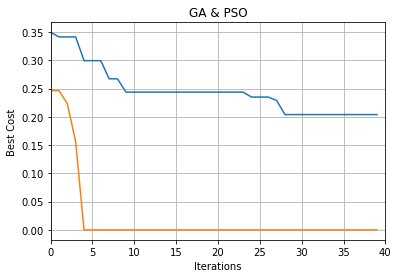

GA :: Iteration 0: Best Cost is = 0.32226176241817195
GA :: Iteration 1: Best Cost is = 0.31296458989480314
GA :: Iteration 2: Best Cost is = 0.3019098948501704
GA :: Iteration 3: Best Cost is = 0.3019098948501704
GA :: Iteration 4: Best Cost is = 0.2440057759748157
GA :: Iteration 5: Best Cost is = 0.2440057759748157
GA :: Iteration 6: Best Cost is = 0.2440057759748157
GA :: Iteration 7: Best Cost is = 0.2440057759748157
GA :: Iteration 8: Best Cost is = 0.23026102690909472
GA :: Iteration 9: Best Cost is = 0.23026102690909472
GA :: Iteration 10: Best Cost is = 0.23026102690909472
GA :: Iteration 11: Best Cost is = 0.23026102690909472
GA :: Iteration 12: Best Cost is = 0.21744602639240948
GA :: Iteration 13: Best Cost is = 0.21744602639240948
GA :: Iteration 14: Best Cost is = 0.21744602639240948
GA :: Iteration 15: Best Cost is = 0.21744602639240948
GA :: Iteration 16: Best Cost is = 0.21744602639240948
GA :: Iteration 17: Best Cost is = 0.21744602639240948
GA :: Iteration 18: Best C

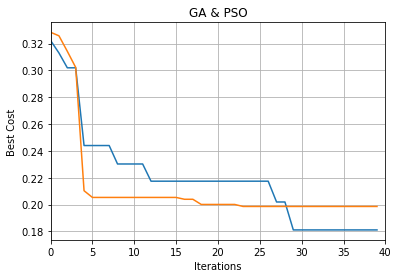

No of process= 5 No of Devices= 34 No of Drones= 2 Process Group= [[1, 2, 3], [4, 5]]
GA :: Average COAOI =  0.19253703097786956
GA :: Number of times Data Collected =  25
GA :: Total Data Collected =  125.0  KByte
GA :: Convergence Iteration number  57
GA :: Elaped Time  153.39999999999998
Total number of Rows written    168


<ipython-input-8-8029ec7de8d9>:37: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet = book.get_sheet_by_name('GA')


saved
PSO :: Average COAOI =  0.09931013788971578
PSO :: Number of times Data Collected =  28
PSO :: Total Data Collected =  140.0  KByte
PSO :: Convergence Iteration number  62
PSO :: Elaped Time  87.66 -  2.8445229530334473 =  84.81547704696655
Total number of Rows written    169


<ipython-input-8-8029ec7de8d9>:88: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet = book.get_sheet_by_name('PSO')


saved


In [8]:
                     ########### VERSION 1   ################### Try to Fix T(time to collect responses) 
                                                                  #and to do that we need to adjust Chromosome size for single, multi drone approach  3 process 12 devices



import matplotlib.pyplot as plt
import random
import math
import numpy as np
from ypstruct import structure
import collections

from xlwt import Workbook
from  xlrd import open_workbook
import openpyxl
from random import *
import random
import sys


############# Helping Functions ####################################
def writeToExcelFile(costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga):
    #define the variables
    rowCount=0
    columnNumber=0
    wb = open_workbook('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    ws = wb.sheet_by_index(0) 
    rowCount = ws.nrows
    rowCount+=1
    columnNumber=1    
    print("Total number of Rows written   ",rowCount)
    writedata(rowCount,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga)

#Data to specified cells.
def writedata(rowNumber,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga):
    book = openpyxl.load_workbook('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    sheet = book.get_sheet_by_name('GA')
    sheet.cell(row=rowNumber, column=1).value = no_drones
    sheet.cell(row=rowNumber, column=2).value = no_process
    sheet.cell(row=rowNumber, column=3).value = no_devices
    sheet.cell(row=rowNumber, column=4).value = PlayTime
    
    sheet.cell(row=rowNumber, column=5).value = problem.T
    sheet.cell(row=rowNumber, column=6).value = params.npop
    sheet.cell(row=rowNumber, column=7).value = params.maxit
    k=8
    for i in range(0,no_drones):
        sheet.cell(row=rowNumber, column=k).value = costofprocess[i]
        k=k+1
        
        
    for i in range(0,5-no_drones):
        sheet.cell(row=rowNumber, column=k).value = .000000000001
        k=k+1
        
    sheet.cell(row=rowNumber, column=13).value = totalcost
    sheet.cell(row=rowNumber, column=14).value = EtaS
    sheet.cell(row=rowNumber, column=15).value = EtaT
    sheet.cell(row=rowNumber, column=16).value = RohS
    sheet.cell(row=rowNumber, column=17).value = RohT
    sheet.cell(row=rowNumber, column=18).value = TotalDataCollected
    sheet.cell(row=rowNumber, column=19).value = TotalDataCollected*2560/1024 * 2 # Expressed in KByte= 2560 Byte for 2 Sec
    sheet.cell(row=rowNumber, column=20).value = convergega
    sheet.cell(row=rowNumber, column=21).value = avgtimeelapedga
    
   
    
    book.save('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    print('saved')

############################################################################################################

def writeToExcelFile2(costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergepso,avgtimeelapedpso):
    #define the variables
    rowCount=0
    columnNumber=0
    wb = open_workbook('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    ws = wb.sheet_by_index(0) 
    rowCount = ws.nrows
    rowCount+=1
    columnNumber=1    
    print("Total number of Rows written   ",rowCount)
    writedata2(rowCount,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergepso,avgtimeelapedpso)

#Data to specified cells.
def writedata2(rowNumber,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergepso,avgtimeelapedpso):
    book = openpyxl.load_workbook('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    sheet = book.get_sheet_by_name('PSO')
    sheet.cell(row=rowNumber, column=1).value = no_drones
    sheet.cell(row=rowNumber, column=2).value = no_process
    sheet.cell(row=rowNumber, column=3).value = no_devices
    sheet.cell(row=rowNumber, column=4).value = PlayTime
    
    sheet.cell(row=rowNumber, column=5).value = problem.T
    sheet.cell(row=rowNumber, column=6).value = params.npop
    sheet.cell(row=rowNumber, column=7).value = params.maxit
    k=8
    for i in range(0,no_drones):
        sheet.cell(row=rowNumber, column=k).value = costofprocess[i]
        k=k+1
        
        
    for i in range(0,5-no_drones):
        sheet.cell(row=rowNumber, column=k).value = .000000000001
        k=k+1
        
    sheet.cell(row=rowNumber, column=13).value = totalcost
    sheet.cell(row=rowNumber, column=14).value = EtaS
    sheet.cell(row=rowNumber, column=15).value = EtaT
    sheet.cell(row=rowNumber, column=16).value = RohS
    sheet.cell(row=rowNumber, column=17).value = RohT
    sheet.cell(row=rowNumber, column=18).value = TotalDataCollected
    sheet.cell(row=rowNumber, column=19).value = TotalDataCollected*2560/1024 * 2 # Expressed in KByte= 2560 Byte for 2 Sec
    sheet.cell(row=rowNumber, column=20).value = convergepso
    sheet.cell(row=rowNumber, column=21).value = avgtimeelapedpso
    
  
    book.save('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    print('saved')



def distribute(numbers, n):
    quotient, remainder = divmod(len(numbers), n)
    result = [numbers[i * quotient + min(i, remainder):(i + 1) * quotient + min(i + 1, remainder)] for i in range(n)]
    return result

def crossover(parent1, parent2, gamma=0.1):  
    c1=parent1.deepcopy()
    c2=parent2.deepcopy()
    
    p1=c1.position.tolist()
    p2=c2.position.tolist()
    
    for i in range(1,random.randint(2,3)): #number of times you want to do crossover
        
        # select crossover point
        crossover_point = random.randint(1, len(parent1.position) - 1)
    
        # create offspring solution
        c1.position = np.array(p1[:crossover_point] + p2[crossover_point:])
        c2.position = np.array(p2[:crossover_point] + p1[crossover_point:])
        p1=c1.position.tolist()
        p2=c2.position.tolist()
    
    return c1, c2

def mutate2(x, mu):
    y=x.deepcopy()
    count=0
    for swaping_p in range(len(y.position)):
        if(random.random() < mu):
            swapedWith = np.random.randint(0,len(y.position))
            temp1=y.position[swaping_p]
            temp2=y.position[swapedWith]
            y.position[swapedWith]=temp1
            y.position[swaping_p]=temp2
            count=count+1

    return y


def roulette_wheel_selection(p):
    c = np.cumsum(p)
    r = sum(p)*np.random.rand()
    ind = np.argwhere(r <= c)
    return ind[0][0]

def findmindistance(frame,v, allindex,distancematrix):
    L=len(allindex)
    devices=[]
    v1=int(frame[v].device[1:])-1
    
    for j in range(v-1, 0, -1) :
        v2=int(frame[j].device[1:])-1
        
        d=distancematrix[v1][v2]
#         print('v1=',v1,'v2=',v2,'dis ',d)
        devices.append(d)
    if len(devices)>0:
        m=min(devices)
    else:
        m=0
#     print('min=',m)
    return m


def distribute_random_numbers(n):
    # generate n random numbers
    nums = [random.random() for i in range(n)]
    # calculate sum
    nums_sum = sum(nums)
    # normalize the numbers
    nums = [num/nums_sum for num in nums]
    return nums


def makedistancematrix(devloc):
    #devloc={'n1': (253, 434), 'n2': (200, 368), 'n3': (76, 372),'n4': (100, 500),'n5': (173, 635), 'n6': (167, 676),'n7': (451, 687),'n8': (240, 643),'n9': (467, 620), 'n10': (474, 709), 'n11': (505, 594),'n12': (458, 494)}
    #Structure of device location
    dismat=[]
    for i in range(1,no_devices+1):

        temp=[]
        device1="n"+str(i)
        node1=devloc[device1]

        for j in range(1,no_devices+1):

            if i !=j:
                device2="n"+str(j)
                node2=devloc[device2]
                distance=math.dist(node1,node2)
            else:
                distance=0.0
            
            temp.append(distance)

        dismat.append(temp)


    return dismat

def count_consecutive_sequences(lst):
    count = 1
    num_sequences = 0
    current_elem = lst[0]

    for elem in lst[1:]:
        if elem == current_elem:
            count += 1
        else:
            current_elem = elem
            if count > 1:
                num_sequences += 1
            count = 1

    if count > 1:
        num_sequences += 1

    return num_sequences


def findtimedifference(v,frame,allindex):
    currentdevice=frame[v].device
    td=1
    if v-1 <0:
        return td
    for k in range(v-1, 0, -1) :
        loc=allindex[k]
        if frame[loc].device == currentdevice:
            td=frame[v].timestamp - frame[loc].timestamp
            break
    
    return td
            
    
def confirmnorepeat(L, avllist):
    #print("LLLLLL",L)
   
    for ind in range(len(L)-1):
        f=L[ind]
        s=L[ind+1]
        
        if f==s:
            while True:
                ch=random.choice(avllist)
                if ch!=f:
                    break
            
        
            L[ind+1]=ch

    return (L)
    
    
def CalculateMLambda(n):
    # generate n random numbers
    #nums = [random.random() for i in range(n)]
    nums = [random.uniform(0.28, 0.40) for i in range(n)]
    # calculate sum
    nums_sum = sum(nums)
    # normalize the numbers
    nums = [num/nums_sum for num in nums]
    return nums    
    

def generateDeviceLocation(no_devices):
    devlocation={}
    point_history=[]
    for i in range(1,no_devices+1):
        node=str("n"+str(i))
        #print(node)
        while True:
            pntX=randint(1, 1000)
            pntY=randint(1, 1000)
            if (pntX,pntY) not in point_history:
                point_history.append((pntX,pntY))
                devlocation[node]=(pntX,pntY)
                break
    return devlocation

def doDeviceProcessMapping(no_process,no_devices):
    numbers = [i for i in range(1,no_devices+1)]
    #random.shuffle(numbers)
    all_dist_p = distribute(numbers, no_process)
    i=1
    pdmap2={}
    for fr in all_dist_p:
        pr=str("p"+str(i))
        i=i+1
        for nd in fr:
            node=str("n"+str(nd))
            pdmap2[node]=pr
    
    return pdmap2




def findTotalDataGathered(frame,PlayTime):
    count=0
    for i in range(0,len(frame)):
        if frame[i].timestamp <= PlayTime:
            count=count+1
    
    return count
            
def findPositionLocation(position,devicelocation):
    
    PL=[]
    for p in position:
        val=devicelocation[p]
        PL.append(float(val[0]))
        PL.append(float(val[1]))
    return PL
    
    
def findNearestDevice(positionlocation, devicelocation,sets):
    dic={}
    pos=[]
    k=0
        
    l=len(positionlocation)
#     print(l)
    for i in range(0,l-1,2):
        x=positionlocation[i]
        y=positionlocation[i+1]
#         print(x,y)
        for nd in sets:
            dist = math.dist((x, y), devicelocation[nd])
            dic[nd]=dist
#             print(dist)
            
#         print(dic)
        sorted_dic = dict(sorted(dic.items(), key=lambda x: x[1]))
        first_key, first_value = next(iter(sorted_dic.items()))
        iterator = iter(sorted_dic.items())

        # Skip the first element
        next(iterator)

        # Retrieve the second element
        second_key, second_value = next(iterator)
#         print(sorted_dic)
#         print(first_key, first_value)
#         print(second_key, second_value)
        
        if k==0:
            pos.append(first_key)
        else:
            lpos=len(pos)
            if pos[lpos-1]==first_key:
                pos.append(second_key)
            else:
                pos.append(first_key)
        k=k+1
#     print(pos)
    return pos
        
        
# Start measuring time elapsed
def tic():
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

# End mesuring time elapsed
def toc():
    import time, math
    if 'startTime_for_tictoc' in globals():
        dt = math.floor(100*(time.time() - startTime_for_tictoc))/100.
        print('Elapsed time is {} second(s).'.format(dt))
        return dt
    else:
        print('Start time not set. You should call tic before toc.')    
        

def count_same_values_from_right(lst):
    count = 0
    last_element = lst[-1]

    # Iterate through the list from right to left
    for i in range(len(lst) - 1, -1, -1):
        if lst[i] == last_element:
            count += 1
        else:
            break

    return count  
    
    
    

############# Helping Functions End ####################################


###############################################################################
#             PSO Algorithm starts
###############################################################################

def PSOrun(problem, params,d,initialpop,ga_aoi):
    import time
    extra_time=0
    # Problem Information
    costfunc = problem.costfunc
    nvar = problem.nvar               #particle's size
    nVar=nvar
    no_process=problem.no_process     # No of process
    no_devices=problem.no_devices     # No of devices that monoitors all process
    pdmap=problem.pdmap               # Device to Process mapping {'n1':p1, 'n2':p2, ....}
    dismat=problem.distancematrix     # Distance matrix(device X device) which holds distances
    devicelocation=problem.devicelocation 

    allsets=problem.allsets #Set of nodes assigned to drones [[3,5,9],[8,1,2]]  3,5,9 nodes is assigned to drone 1

    #BufferTime BT
    BT=1

    # Parameters
    maxit = params.MaxIter
    npop = params.PopSize
    c1 = params.c1
    c2 = params.c2
    w = params.w
    wdamp = params.wdamp
    wmax=.9
    wmin=.4

    # Empty Individual Particle Template
    
    empty_individual = structure()
    empty_individual.position = None
    empty_individual.positionlocation = None
    empty_individual.velocity = None
    empty_individual.cost = None
    empty_individual.dataCollected=None
    empty_individual.best_position=None
    empty_individual.best_positionlocation=None
    empty_individual.best_cost=None

#     Best Solution Ever Found
    bestsol = empty_individual.deepcopy()
    bestsol.cost = np.inf

    # Initialize Best Solution Ever Found
    gbest = empty_individual.deepcopy()
    gbest.position = None
    gbest.positionlocation = None
    gbest.cost = np.inf

    # Create Initial Population
    pop = empty_individual.repeat(npop)
    
    for i in range(npop):
#         pos=[]
#         for k in range(1,nvar+1):
#             pos.append(random.choice(allsets[d]))
          
#         pos=confirmnorepeat(pos,allsets[d])
#         pop[i].position = np.array(pos)
        pop[i].position=initialpop[i].position
    
        posloc=findPositionLocation(pop[i].position,devicelocation)
        
        pop[i].positionlocation=np.array(posloc)
        
        pop[i].velocity = np.zeros(nvar*2)
        
        RV = costfunc(pop[i].position)
        pop[i].cost = RV.costvalue
        pop[i].dataCollected=nvar-RV.dataignored
        
        
        pop[i].best_position = pop[i].position.copy()
        pop[i].best_positionlocation = pop[i].positionlocation.copy()
        pop[i].best_cost = pop[i].cost
        
        if pop[i].best_cost < gbest.cost:
            gbest.position = pop[i].best_position.copy()
            gbest.positionlocation = pop[i].best_positionlocation.copy()
            gbest.cost = pop[i].best_cost
    
    
    # To store Best Cost of all Iterations
    maxit=maxit*1
    bestcost = np.empty(maxit)
    
    
    
    # PSO Loop
    for it in range(0, maxit):
        for i in range(0, npop):
            
#             pop[i].velocity = w*pop[i].velocity \
#                 + c1*np.random.rand(nVar)*(pop[i].best_position - pop[i].position) \
#                 + c2*np.random.rand(nVar)*(gbest.position - pop[i].position)
            
            pop[i].velocity = w*pop[i].velocity \
                + c1*np.random.rand(nVar*2)*(pop[i].best_positionlocation - pop[i].positionlocation) \
                + c2*np.random.rand(nVar*2)*(gbest.positionlocation - pop[i].positionlocation)



            
            pop[i].positionlocation += pop[i].velocity
#             pop[i].positionlocation = np.maximum(pop[i].positionlocation, varmin)
#             pop[i].positionlocation = np.minimum(pop[i].positionlocation, varmax)
            
            
            start_time1 = time.time()
            pos=findNearestDevice(pop[i].positionlocation, devicelocation,allsets[d])
            pop[i].position=np.array(pos)
            
            #Added these lines to test { Starts
            posloc=findPositionLocation(pop[i].position,devicelocation)
            pop[i].positionlocation=np.array(posloc)
            #Added these lines to test } Ends
            end_time1 = time.time()
            time_difference1 = end_time1 - start_time1
            extra_time=extra_time+time_difference1

                
            
            RV = costfunc(pop[i].position)
            pop[i].cost = RV.costvalue
            pop[i].dataCollected=nvar-RV.dataignored
            
            
            
            if pop[i].cost < pop[i].best_cost:
                pop[i].best_position = pop[i].position.copy()
                pop[i].best_positionlocation = pop[i].positionlocation.copy()
                pop[i].best_cost = pop[i].cost

                if pop[i].best_cost < gbest.cost:
                    gbest.position = pop[i].best_position.copy()
                    gbest.positionlocation = pop[i].best_positionlocation.copy()
                    gbest.cost = pop[i].best_cost

        #w *= wdamp
        w=wmax-((wmax-wmin)/maxit)*it
        print('PSO :: Iteration {}: Best Cost = {}'.format(it, gbest.cost))
        # Store Best Cost
        bestcost[it] = gbest.cost
        if gbest.cost <= ga_aoi:
            break
        

    # Output
#     out = structure()
#     out.pop = pop
#     out.bestsol = bestsol
#     out.bestcost = bestcost
    
    
    out = structure()
    out.pop = pop
    out.bestsol = gbest
    out.bestcost = bestcost
    out.extra_time=extra_time
    print(extra_time)
    return out
    
    
    
    
    
    
    

############# Helping Functions End ####################################


###############################################################################
#             GA Algorithm starts
###############################################################################

def run(problem, params,d):
    
    # Problem Information
    costfunc = problem.costfunc
    nvar = problem.nvar          #chromosome size
    no_process=problem.no_process     # No of process
    no_devices=problem.no_devices     # No of devices that monoitors all process
    pdmap=problem.pdmap               # Device to Process mapping {'n1':p1, 'n2':p2, ....}
    dismat=problem.distancematrix     # Distance matrix(device X device) which holds distances

    allsets=problem.allsets #Set of nodes assigned to drones [[3,5,9],[8,1,2]]  3,5,9 drone is assigned to drone 1

    #BufferTime BT
    BT=1

    # Parameters
    maxit = params.maxit
    npop = params.npop
    beta = params.beta
    pc = params.pc
    nc = int(np.round(pc*npop/2)*2)
    gamma = params.gamma
    mu = params.mu
    sigma = params.sigma

    # Empty Individual Template
    empty_individual = structure()
    empty_individual.position = None
    empty_individual.cost = None
    empty_individual.dataCollected=None

    # Best Solution Ever Found
    bestsol = empty_individual.deepcopy()
    bestsol.cost = np.inf

    # Initialize Population
    pop = empty_individual.repeat(npop)
    initialpop=empty_individual.repeat(npop)
    
    for i in range(npop):
 
        pos=[]
        for k in range(1,nvar+1):
            pos.append(random.choice(allsets[d]))
            
        pos=confirmnorepeat(pos,allsets[d])
               
        pop[i].position = np.array(pos)
        initialpop[i].position=np.array(pos)
        #pop[i].cost = costfunc(pop[i].position)
        RV = costfunc(pop[i].position)
        pop[i].cost = RV.costvalue
        pop[i].dataCollected=nvar-RV.dataignored
        
        if pop[i].cost < bestsol.cost:
            bestsol = pop[i].deepcopy()

    # Best Cost of Iterations
    bestcost = np.empty(maxit)
    
    # Main Loop
    for it in range(maxit):

        costs = np.array([x.cost for x in pop])
        avg_cost = np.mean(costs)
#         if avg_cost != 0:
#             costs = costs/avg_cost
        
        costs = costs/(avg_cost+1)
        probs = np.exp(-beta*costs)

        popc = []                            # child population
        for _ in range(nc//2):


#             # Perform Roulette Wheel Selection
            p1 = pop[roulette_wheel_selection(probs)]
            p2 = pop[roulette_wheel_selection(probs)]

            # Perform Crossover
            c1, c2 = crossover(p1, p2, gamma)

            # Perform Mutation
#             c1 = mutate(c1, mu, sigma)
#             c2 = mutate(c2, mu, sigma)
            # Perform Mutation
            c1 = mutate2(c1, mu)
            c2 = mutate2(c2, mu)
            c1.position=confirmnorepeat(c1.position,allsets[d])
            c2.position=confirmnorepeat(c2.position,allsets[d])


            # Evaluate First Offspring
            #c1.cost = costfunc(c1.position)
            RV = costfunc(c1.position)
            c1.cost = RV.costvalue
            c1.dataCollected=nvar-RV.dataignored
            
            if c1.cost < bestsol.cost:
                bestsol = c1.deepcopy()

            # Evaluate Second Offspring
            #c2.cost = costfunc(c2.position)
            
            RV = costfunc(c2.position)
            c2.cost = RV.costvalue
            c2.dataCollected=nvar-RV.dataignored
            
            if c2.cost < bestsol.cost:
                bestsol = c2.deepcopy()

            # Add Offsprings to popc
            popc.append(c1)
            popc.append(c2)
        

        # Merge, Sort and Select
        pop += popc
        pop = sorted(pop, key=lambda x: x.cost)
        pop = pop[0:npop]

        # Store Best Cost
        bestcost[it] = bestsol.cost

        # Show Iteration Information
        print("GA :: Iteration {}: Best Cost is = {}".format(it, bestcost[it]))

    # Output
    out = structure()
    out.pop = pop
    out.bestsol = bestsol
    out.bestcost = bestcost
    out.initialpop=initialpop
    return out


       
    
gcount=1   

def AoICostFunction(x):    #x is the position of the gene in chromosomes [ n1,n3,n5,n7 .....]

    node= structure()
    node.k=None
    node.process=None
    node.device=None
    node.hovertime=0
    node.buffertime=0
    node.timestamp=0
    node.communtime=0
    node.receivetime=0
    node.updateno=None
    frame = node.repeat(len(x)) # it holds Sequence of node visited by UAV
#     for i in range(0,len(x)-1):
#         print(x[i],", ",end='')
    
    hoverdistance=[0.0]
    for i in range(0,len(x)-1):
        v1=x[i]         
        v1=v1[1:]
        v1=int(v1)
        v1=v1-1
        
        v2=x[i+1]
        v2=v2[1:]
        v2=int(v2)
        v2=v2-1
        #print('v1= ',v1, 'V2= ',v2)
        d=distancematrix[v1][v2]
        hoverdistance.append(d)
        
 
    #Calculate cost of frame
    no_of_unique_process={deviceprocessmap[x[0]]}
    oldreceivetime=0
    index=0
    for f in frame:
        f.device=x[index]
        #print("ddddddddddevice",f.device)
        key=f.device
        f.process=deviceprocessmap[key]   #finds the process which is monitored by device, key
        no_of_unique_process.add(f.process)
        #dronespeed=2
        f.hovertime= hoverdistance[index] / dronespeed      # hovering time
        #f.bufferedtime= random.randint(0, 10**5)/ 10**5
        f.bufferedtime= 0
        f.timestamp=oldreceivetime+f.hovertime+f.bufferedtime
        f.communtime=0.06481694493662243
        f.receivetime=f.timestamp+f.communtime
        oldreceivetime=f.receivetime
        #print("[",f.process,f.device,",",round(f.timestamp,3),"]",end="")
        index=index+1
    
        
    #for each Process calculate CAAoI
    #T=frame[index-1].receivetime
    
    #print("Last time stamp ",T," But Play Time=",PlayTime," No of processes ",no_of_unique_process)
    #T=500*len(no_of_unique_process)*4
    
    T=PlayTime
    
    allsum=0
    dataignored=0
    for k in range(1,no_process+1):
        
        process="p"+str(k)
        
        allindex=[]
        #find the index position where this "process" is found in the frame
        index=0
        for f in frame:
            if f.process==process:
                allindex.append(index)
                f.updateno=index+1
            index=index+1
        #Visit all frame position where "process" is found
        #print("K= ",k," process= ",process,' No of updates found =',len(allindex))
        if len(allindex)==0:
            #print('So ignoring process = ',process)
            continue
        sum=0
        kount=1
        for v in range(len(allindex)-1, 0, -1) :
            
            j=allindex[v]         #frame position where "process" is found
            j2=allindex[v-1]      #frame position where previous events of "process" is found
            
            
            
#             alpha=random.uniform(0.35, 0.49)
#             alpha=1
#             if kount%2==1:
#                 alpha=.5
#             else:
#                 alpha=.4
#             kount=kount+1
#             print('alpha = ',alpha)
           
            if v==index-1:
                alpha=1
            else:
                #djdot= findmindistance(frame,v, allindex,distancematrix)  #current distance - last distance
                v1=frame[j].device         
                v1=v1[1:]
                v1=int(v1)
                v1=v1-1
        
                v2=frame[j2].device
                v2=v2[1:]
                v2=int(v2)
                v2=v2-1
                #print('v1= ',v1, 'V2= ',v2)
                djdot=distancematrix[v1][v2]
                
                tjdot=frame[j].timestamp-frame[j2].timestamp
                #tjdot=findtimedifference(v,frame,allindex)  # the time difference between the current update and the last update about pk from the same device.1
                #EtaS=1
                #EtaT=0
                #RohS=1000
                #RohT=100
                
                Es=EtaS
                Et=EtaT
                Ps=RohS
                Pt=RohT
                
                alpha=1-((Es+Et)/(Es*djdot/Ps+ Et*tjdot/Pt+Es*Et+1))

                #print('alpha = ',alpha,' dj=',djdot, 'tj= ',tjdot)
                
            lasttimestamp=frame[j].timestamp
            lastreceivetime=frame[j].receivetime
            prevtimestamp=frame[j2].timestamp
            
#             c1=alpha*(lasttimestamp-prevtimestamp)*(T-lastreceivetime)
#             c1=alpha*(lasttimestamp-prevtimestamp)*(T-2)
#             c1=alpha*(lasttimestamp-prevtimestamp)*(T-lasttimestamp)  #sandip da 
            c1=alpha*(lasttimestamp-prevtimestamp)*(T-2)  #sandip da 
            if frame[j].timestamp > PlayTime:
                #print(frame[j2].timestamp)
                
                c1=0
            sum=sum+c1
        c2=T/2-sum/T           #Eq 10
        #print('process= ',process,' Aoi= ',c2)
        c3=mlambda[k-1] * c2
        allsum=allsum+c3
#         allsum=c2
    
    costvalue=allsum/(.5*T)
    #costvalue=allsum

    
        
    #return random.random()
#     if costvalue<0:
#         return 99999999

    dataignored=0
    for i in range(0,len(frame)):
        if frame[i].timestamp > PlayTime:
            dataignored=dataignored+1
            
    
#     print("Last timestamp considered= ",frame[120-dataignored-1].timestamp)
    returnValues=structure()
    returnValues.dataignored=dataignored
    returnValues.costvalue=costvalue
    
    return returnValues
    #return costvalue








########### INITIALIZE ##########

extra_time=0
# A typical fixed-wing drone flies at a minimum speed of 12 meters per second (m/s), and typically a fast shutter speed is 1/1000 of a second.
dronespeed=12  #12 m / second

plocations = {'p1':(100,400),'p2':(200,630),'p3':(450,650)}


no_drones=2
no_process=5
no_devices=34

EtaS=1               #  EtaS=1 EtaT=0    means Correlational
EtaT=0               #  EtaS=0 EtaT=0    means Conventional
RohS=1000
RohT=1000



#mlambda=[.40,.35,.25]
# mlambda=[.333,.333,.333]
mlambda=[1,1,1]

PlayTime=600       #Time to hover the drone

# Problem Definition
problem = structure()
problem.costfunc = AoICostFunction   #CostFunction
problem.T=40*(no_drones+1)+40        #chromosome size
problem.no_process=no_process   
problem.no_devices=no_devices
problem.nvar = problem.T

# problem.devicelocation={'n1': (253, 434), 'n2': (200, 368), 'n3': (76, 372),'n4': (100, 500), 
#                         'n5': (173, 635), 'n6': (167, 676),'n7': (451, 687),'n8': (240, 643),
#                         'n9': (467, 620), 'n10': (474, 709), 'n11': (505, 594),'n12': (458, 494)}

problem.devicelocation=generateDeviceLocation(no_devices)
#print("decice location    ", devicelocation)   


problem.distancematrix=makedistancematrix(problem.devicelocation)
distancematrix=problem.distancematrix

problem.pdmap=doDeviceProcessMapping(no_process,no_devices)
#print("Process device map ", pdmap)
      
deviceprocessmap=problem.pdmap


######################################################################################
# GA Parameters
######################################################################################

params = structure()
params.maxit = 40   #Set maximum iteration
params.npop = 50   # Set number of population you want to create

#Although there is some tendency to use crossover rate on level 0.7-0.9 and mutation on 0.1-0.3 it really depends. 
params.beta = 1
params.pc = 1
params.gamma = 0.1
params.mu = 0.1
params.sigma = 0.1

######################################################################################
######################################################################################
######################################################################################
# PSO Parameters
######################################################################################

params2 = structure()
params2.MaxIter = 40   #Set maximum iteration
params2.PopSize = 50   # Set number of population you want to create

# params2.c1 = 1.5
# params2.c2 = 2
# params2.w = .75
# params2.wdamp = 0.995
params2.c1 = 1.75
params2.c2 = 2.05
params2.w = .9
params2.wdamp = 0.995



######################################################################################
######################################################################################

numbers = [i for i in range(1,no_process+1)]
all_dist_process = distribute(numbers, no_drones)
print("No of process=",no_process,"No of Devices=",no_devices,"No of Drones=", no_drones,"Process Group=", all_dist_process)
print()


allsets=[]
for adp in all_dist_process:
    d=[]
    for p in adp:
        pr="p"+str(p)
        d2=[k for k,v in problem.pdmap.items() if v== pr] # collecting all nodes of a "pr" process
        d=d+d2
       
    allsets.append(d) # adding all nodes of various process monitored by a drone 
        
problem.allsets=allsets  # contains all devices group by monitored drones

######################################################################################
######################################################################################
khelasum=0
khelasum2=0
mlambda=[]

for i in range(0,len(all_dist_process)):
    
    mprocess=len(all_dist_process[i])
    l2=CalculateMLambda(mprocess)
    for j in range(0,len(l2)):
        mlambda.append(l2[j])
        

    
    
print(mlambda)

costofprocess=[]
costofprocess2=[]
TotalDataCollected=0
TotalDataCollected2=0

convergega=0
convergepso=0

avgtimeelapedga=0
avgtimeelapedpso=0

for i in range(0,no_drones):
    
    
    
    # Run GA
    #startTime_for_tictoc = time.time()
    tic()
    out = run(problem, params,i)
    #ttt=math.floor(100*(time.time() - startTime_for_tictoc))/100.
    ttt=toc()
    avgtimeelapedga=avgtimeelapedga+ttt
#     khelasum=khelasum+out.bestcost[0]
#     costofprocess.append(out.bestcost[0])
    khelasum=khelasum+min(out.bestcost)
    costofprocess.append(min(out.bestcost))
    print("khelasum= ",khelasum)
    
    ####To count how fast it is converged, I am trying count number of times same best values
    # are recorded. Then from total iteration I will deduct the count value an i will get the 
    # needed iteration number to converge
    
    ccc=count_same_values_from_right(out.bestcost)
    convergega=convergega+(params.maxit-ccc)
    
    ##Converge count end
    
    # Results
    #print('variables value',out.pop[0]['position'])
    print('Number of consecutive same sequence = ',count_consecutive_sequences(out.pop[0]['position']))
    dataCollected=out.pop[0]['dataCollected']
    TotalDataCollected=TotalDataCollected+dataCollected
    print('GA Drone ',i,' Collected data= ',dataCollected)
    plt.plot(out.bestcost)
    
    # Run PSO
    initialpop=out.initialpop
    #startTime_for_tictoc = time.time()
    tic()
    ga_aoi=min(out.bestcost)
    
    out = PSOrun(problem, params2,i,initialpop,ga_aoi)
    #ttt=math.floor(100*(time.time() - startTime_for_tictoc))/100.
    ttt=toc()
    avgtimeelapedpso=avgtimeelapedpso+ttt
    extra_time=extra_time+out.extra_time
#     khelasum=khelasum+out.bestcost[0]
#     costofprocess.append(out.bestcost[0])
    khelasum2=khelasum2+min(out.bestcost)
    costofprocess2.append(min(out.bestcost))
    print("khelasum= ",khelasum2)
    
    ####To count how fast it is converged, I am trying count number of times same best values
    # are recorded. Then from total iteration I will deduct the count value an i will get the 
    # needed iteration number to converge
    
    ccc=count_same_values_from_right(out.bestcost)
    convergepso=convergepso+(params2.MaxIter-ccc)
    
    ##Converge count end
    
    
    # Results
    #print('variables value',out.pop[0]['position'])
    print('Number of consecutive same sequence = ',count_consecutive_sequences(out.pop[0]['position']))
    dataCollected=out.pop[0]['dataCollected']
    TotalDataCollected2=TotalDataCollected2+dataCollected
    print('PSO Drone ',i,' Collected data= ',dataCollected)
    plt.plot(out.bestcost)
    
  
    # plt.semilogy(out.bestcost)
    plt.xlim(0, params.maxit)
    plt.xlabel('Iterations')
    plt.ylabel('Best Cost')
    plt.title('GA & PSO')
    plt.grid(True)
    plt.show()
    
    ################### Printing Scater Graph ###########################

#     x=[]
#     y=[]
#     labels=[]
#     for i in range(problem.no_devices):
#         key="n"+str(i+1)
#         labels.append(key)
#         x.append(problem.devicelocation[key][0])
#         y.append(problem.devicelocation[key][1])

#     visited_nodes=out.pop[0]['position'].tolist()
#     x2=[]
#     y2=[]
#     for vn in visited_nodes:
#         x2.append(problem.devicelocation[vn][0])
#         y2.append(problem.devicelocation[vn][1])
    
#     plt.scatter(x, y,label='Device ID')
#     plt.plot(x2,y2)

#     # Add labels to each point
#     for i, label in enumerate(labels):
#         plt.annotate(label, (x[i], y[i]))

#     # Add title and axis labels
#     plt.title('Scatter Plot')
#     plt.xlabel('X-axis')
#     plt.ylabel('Y-axis')
#     # Add legend
#     plt.legend()
#     # Display the plot
#     plt.show()

#     ############## Printing the frequency of each devices ##########################
#     random_list=out.pop[0]['position'].tolist()
#     frequency = {}
#     # iterating over the list
#     for item in random_list:
#        # checking the element in dictionary
#         if item in frequency:
#           # incrementing the count
#           frequency[item] += 1
#         else:
#           # initializing the count
#           frequency[item] = 1

#     # printing the frequency
#     #print(frequency)
#     myKeys = list(frequency.keys())
#     myKeys.sort()
#     sorted_dict = {i: frequency[i] for i in myKeys}
#     print(sorted_dict)
#     ############## Printing the order of process visited ##########################
#     visited_nodes=out.pop[0]['position'].tolist()
#     pro=[]
#     for v in visited_nodes:
#         pro.append(problem.pdmap[v])
    
#     #print('order of process visited',pro)
#     # using Counter to find frequency of elements
#     frequency = collections.Counter(pro)

#     # printing the frequency
#     print("Process served ",dict(frequency))
    
print("No of process=",no_process,"No of Devices=",no_devices,"No of Drones=", no_drones,"Process Group=", all_dist_process)
avgAoI=khelasum/len(all_dist_process)
avgAoI2=khelasum2/len(all_dist_process)

print("GA :: Average COAOI = ", avgAoI)  
print("GA :: Number of times Data Collected = ",TotalDataCollected)
print("GA :: Total Data Collected = ",TotalDataCollected*2560/1024*2," KByte")
print("GA :: Convergence Iteration number ",convergega)
print("GA :: Elaped Time ",avgtimeelapedga)
writeToExcelFile(costofprocess,avgAoI,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga)


print("PSO :: Average COAOI = ", avgAoI2)  
print("PSO :: Number of times Data Collected = ",TotalDataCollected2)
print("PSO :: Total Data Collected = ",TotalDataCollected2*2560/1024*2," KByte")
print("PSO :: Convergence Iteration number ",convergepso)
print("PSO :: Elaped Time ",avgtimeelapedpso,"- ",extra_time,"= ",avgtimeelapedpso-extra_time)
writeToExcelFile2(costofprocess2,avgAoI2,EtaS,EtaT,RohS,RohT,TotalDataCollected2,convergepso,avgtimeelapedpso-extra_time)







No of process= 5 No of Devices= 34 No of Drones= 4 Process Group= [[1, 2], [3], [4], [5]]

[0.49004191608320147, 0.5099580839167984, 1.0, 1.0, 1.0]
GA :: Iteration 0: Best Cost is = 0.29938156137435706
GA :: Iteration 1: Best Cost is = 0.29938156137435706
GA :: Iteration 2: Best Cost is = 0.29938156137435706
GA :: Iteration 3: Best Cost is = 0.29938156137435706
GA :: Iteration 4: Best Cost is = 0.29938156137435706
GA :: Iteration 5: Best Cost is = 0.27166707253397715
GA :: Iteration 6: Best Cost is = 0.27166707253397715
GA :: Iteration 7: Best Cost is = 0.27166707253397715
GA :: Iteration 8: Best Cost is = 0.27096832853836017
GA :: Iteration 9: Best Cost is = 0.23546893662198953
GA :: Iteration 10: Best Cost is = 0.23546893662198953
GA :: Iteration 11: Best Cost is = 0.23546893662198953
GA :: Iteration 12: Best Cost is = 0.23546893662198953
GA :: Iteration 13: Best Cost is = 0.23546893662198953
GA :: Iteration 14: Best Cost is = 0.23546893662198953
GA :: Iteration 15: Best Cost is = 0.

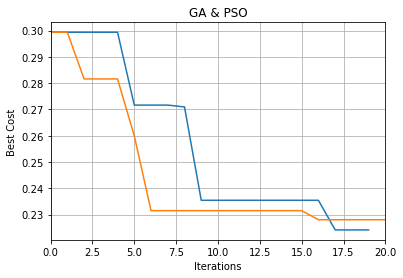

GA :: Iteration 0: Best Cost is = 0.08063674734388902
GA :: Iteration 1: Best Cost is = 0.08063674734388902
GA :: Iteration 2: Best Cost is = 0.08063674734388902
GA :: Iteration 3: Best Cost is = 0.07404807443034031
GA :: Iteration 4: Best Cost is = 0.07404807443034031
GA :: Iteration 5: Best Cost is = 0.07404807443034031
GA :: Iteration 6: Best Cost is = 0.05386045876891975
GA :: Iteration 7: Best Cost is = 0.05386045876891975
GA :: Iteration 8: Best Cost is = 0.05386045876891975
GA :: Iteration 9: Best Cost is = 0.05386045876891975
GA :: Iteration 10: Best Cost is = 0.03827268861950605
GA :: Iteration 11: Best Cost is = 0.03827268861950605
GA :: Iteration 12: Best Cost is = 0.03827268861950605
GA :: Iteration 13: Best Cost is = 0.03827268861950605
GA :: Iteration 14: Best Cost is = 0.03827268861950605
GA :: Iteration 15: Best Cost is = 0.03827268861950605
GA :: Iteration 16: Best Cost is = 0.03827268861950605
GA :: Iteration 17: Best Cost is = 0.03827268861950605
GA :: Iteration 18: 

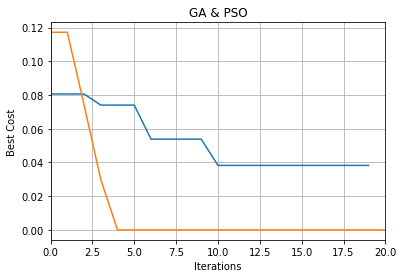

GA :: Iteration 0: Best Cost is = 0.11774115995029925
GA :: Iteration 1: Best Cost is = 0.11774115995029925
GA :: Iteration 2: Best Cost is = 0.11774115995029925
GA :: Iteration 3: Best Cost is = 0.11774115995029925
GA :: Iteration 4: Best Cost is = 0.11774115995029925
GA :: Iteration 5: Best Cost is = 0.11774115995029925
GA :: Iteration 6: Best Cost is = 0.11774115995029925
GA :: Iteration 7: Best Cost is = 0.11774115995029925
GA :: Iteration 8: Best Cost is = 0.10891972185751987
GA :: Iteration 9: Best Cost is = 0.10891972185751987
GA :: Iteration 10: Best Cost is = 0.10891972185751987
GA :: Iteration 11: Best Cost is = 0.10596408346295315
GA :: Iteration 12: Best Cost is = 0.10596408346295315
GA :: Iteration 13: Best Cost is = 0.10596408346295315
GA :: Iteration 14: Best Cost is = 0.1023692167662809
GA :: Iteration 15: Best Cost is = 0.1023692167662809
GA :: Iteration 16: Best Cost is = 0.1023692167662809
GA :: Iteration 17: Best Cost is = 0.1023692167662809
GA :: Iteration 18: Best

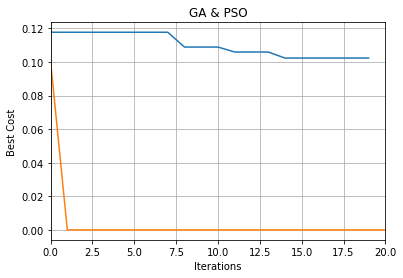

GA :: Iteration 0: Best Cost is = 0.20051453696228075
GA :: Iteration 1: Best Cost is = 0.17542809432490325
GA :: Iteration 2: Best Cost is = 0.17051814910655166
GA :: Iteration 3: Best Cost is = 0.10555512528534222
GA :: Iteration 4: Best Cost is = 0.10555512528534222
GA :: Iteration 5: Best Cost is = 0.10555512528534222
GA :: Iteration 6: Best Cost is = 0.10555512528534222
GA :: Iteration 7: Best Cost is = 0.10555512528534222
GA :: Iteration 8: Best Cost is = 0.10555512528534222
GA :: Iteration 9: Best Cost is = 0.10555512528534222
GA :: Iteration 10: Best Cost is = 0.10555512528534222
GA :: Iteration 11: Best Cost is = 0.10555512528534222
GA :: Iteration 12: Best Cost is = 0.104213989496061
GA :: Iteration 13: Best Cost is = 0.104213989496061
GA :: Iteration 14: Best Cost is = 0.08153837375112573
GA :: Iteration 15: Best Cost is = 0.08153837375112573
GA :: Iteration 16: Best Cost is = 0.08153837375112573
GA :: Iteration 17: Best Cost is = 0.08153837375112573
GA :: Iteration 18: Best

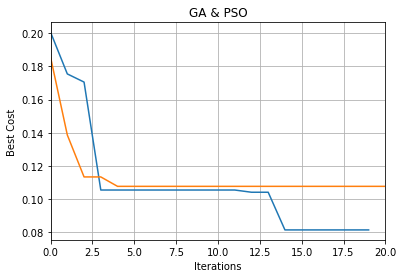

No of process= 5 No of Devices= 34 No of Drones= 4 Process Group= [[1, 2], [3], [4], [5]]
GA :: Average COAOI =  0.11159335617826452
GA :: Number of times Data Collected =  38
GA :: Total Data Collected =  190.0  KByte
GA :: Convergence Iteration number  55
GA :: Elaped Time  81.31
Total number of Rows written    199


<ipython-input-1-4a5371f8ecd7>:37: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet = book.get_sheet_by_name('GA')


saved
PSO :: Average COAOI =  0.08395645373593374
PSO :: Number of times Data Collected =  44
PSO :: Total Data Collected =  220.0  KByte
PSO :: Convergence Iteration number  -135
PSO :: Elaped Time  125.13 -  2.9606032371520996 =  122.1693967628479
Total number of Rows written    200


<ipython-input-1-4a5371f8ecd7>:88: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet = book.get_sheet_by_name('PSO')


saved


In [1]:
                     ########### VERSION 2   ################### Try to Fix T(time to collect responses) 
                                                                  #and to do that we need to adjust Chromosome size for single, multi drone approach  3 process 12 devices



import matplotlib.pyplot as plt
import random
import math
import numpy as np
from ypstruct import structure
import collections

from xlwt import Workbook
from  xlrd import open_workbook
import openpyxl
from random import *
import random
import sys


############# Helping Functions ####################################
def writeToExcelFile(costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga):
    #define the variables
    rowCount=0
    columnNumber=0
    wb = open_workbook('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    ws = wb.sheet_by_index(0) 
    rowCount = ws.nrows
    rowCount+=1
    columnNumber=1    
    print("Total number of Rows written   ",rowCount)
    writedata(rowCount,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga)

#Data to specified cells.
def writedata(rowNumber,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga):
    book = openpyxl.load_workbook('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    sheet = book.get_sheet_by_name('GA')
    sheet.cell(row=rowNumber, column=1).value = no_drones
    sheet.cell(row=rowNumber, column=2).value = no_process
    sheet.cell(row=rowNumber, column=3).value = no_devices
    sheet.cell(row=rowNumber, column=4).value = PlayTime
    
    sheet.cell(row=rowNumber, column=5).value = problem.T
    sheet.cell(row=rowNumber, column=6).value = params.npop
    sheet.cell(row=rowNumber, column=7).value = params.maxit
    k=8
    for i in range(0,no_drones):
        sheet.cell(row=rowNumber, column=k).value = costofprocess[i]
        k=k+1
        
        
    for i in range(0,5-no_drones):
        sheet.cell(row=rowNumber, column=k).value = .000000000001
        k=k+1
        
    sheet.cell(row=rowNumber, column=13).value = totalcost
    sheet.cell(row=rowNumber, column=14).value = EtaS
    sheet.cell(row=rowNumber, column=15).value = EtaT
    sheet.cell(row=rowNumber, column=16).value = RohS
    sheet.cell(row=rowNumber, column=17).value = RohT
    sheet.cell(row=rowNumber, column=18).value = TotalDataCollected
    sheet.cell(row=rowNumber, column=19).value = TotalDataCollected*2560/1024 * 2 # Expressed in KByte= 2560 Byte for 2 Sec
    sheet.cell(row=rowNumber, column=20).value = convergega
    sheet.cell(row=rowNumber, column=21).value = avgtimeelapedga
    
   
    
    book.save('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    print('saved')

############################################################################################################

def writeToExcelFile2(costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergepso,avgtimeelapedpso):
    #define the variables
    rowCount=0
    columnNumber=0
    wb = open_workbook('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    ws = wb.sheet_by_index(0) 
    rowCount = ws.nrows
    rowCount+=1
    columnNumber=1    
    print("Total number of Rows written   ",rowCount)
    writedata2(rowCount,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergepso,avgtimeelapedpso)

#Data to specified cells.
def writedata2(rowNumber,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergepso,avgtimeelapedpso):
    book = openpyxl.load_workbook('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    sheet = book.get_sheet_by_name('PSO')
    sheet.cell(row=rowNumber, column=1).value = no_drones
    sheet.cell(row=rowNumber, column=2).value = no_process
    sheet.cell(row=rowNumber, column=3).value = no_devices
    sheet.cell(row=rowNumber, column=4).value = PlayTime
    
    sheet.cell(row=rowNumber, column=5).value = problem.T
    sheet.cell(row=rowNumber, column=6).value = params.npop
    sheet.cell(row=rowNumber, column=7).value = params.maxit
    k=8
    for i in range(0,no_drones):
        sheet.cell(row=rowNumber, column=k).value = costofprocess[i]
        k=k+1
        
        
    for i in range(0,5-no_drones):
        sheet.cell(row=rowNumber, column=k).value = .000000000001
        k=k+1
        
    sheet.cell(row=rowNumber, column=13).value = totalcost
    sheet.cell(row=rowNumber, column=14).value = EtaS
    sheet.cell(row=rowNumber, column=15).value = EtaT
    sheet.cell(row=rowNumber, column=16).value = RohS
    sheet.cell(row=rowNumber, column=17).value = RohT
    sheet.cell(row=rowNumber, column=18).value = TotalDataCollected
    sheet.cell(row=rowNumber, column=19).value = TotalDataCollected*2560/1024 * 2 # Expressed in KByte= 2560 Byte for 2 Sec
    sheet.cell(row=rowNumber, column=20).value = convergepso
    sheet.cell(row=rowNumber, column=21).value = avgtimeelapedpso
    
  
    book.save('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    print('saved')



def distribute(numbers, n):
    quotient, remainder = divmod(len(numbers), n)
    result = [numbers[i * quotient + min(i, remainder):(i + 1) * quotient + min(i + 1, remainder)] for i in range(n)]
    return result

def crossover(parent1, parent2, gamma=0.1):  
    c1=parent1.deepcopy()
    c2=parent2.deepcopy()
    
    p1=c1.position.tolist()
    p2=c2.position.tolist()
    
    for i in range(1,random.randint(2,3)): #number of times you want to do crossover
        
        # select crossover point
        crossover_point = random.randint(1, len(parent1.position) - 1)
    
        # create offspring solution
        c1.position = np.array(p1[:crossover_point] + p2[crossover_point:])
        c2.position = np.array(p2[:crossover_point] + p1[crossover_point:])
        p1=c1.position.tolist()
        p2=c2.position.tolist()
    
    return c1, c2

def mutate2(x, mu):
    y=x.deepcopy()
    count=0
    for swaping_p in range(len(y.position)):
        if(random.random() < mu):
            swapedWith = np.random.randint(0,len(y.position))
            temp1=y.position[swaping_p]
            temp2=y.position[swapedWith]
            y.position[swapedWith]=temp1
            y.position[swaping_p]=temp2
            count=count+1

    return y


def roulette_wheel_selection(p):
    c = np.cumsum(p)
    r = sum(p)*np.random.rand()
    ind = np.argwhere(r <= c)
    return ind[0][0]

def findmindistance(frame,v, allindex,distancematrix):
    L=len(allindex)
    devices=[]
    v1=int(frame[v].device[1:])-1
    
    for j in range(v-1, 0, -1) :
        v2=int(frame[j].device[1:])-1
        
        d=distancematrix[v1][v2]
#         print('v1=',v1,'v2=',v2,'dis ',d)
        devices.append(d)
    if len(devices)>0:
        m=min(devices)
    else:
        m=0
#     print('min=',m)
    return m


def distribute_random_numbers(n):
    # generate n random numbers
    nums = [random.random() for i in range(n)]
    # calculate sum
    nums_sum = sum(nums)
    # normalize the numbers
    nums = [num/nums_sum for num in nums]
    return nums


def makedistancematrix(devloc):
    #devloc={'n1': (253, 434), 'n2': (200, 368), 'n3': (76, 372),'n4': (100, 500),'n5': (173, 635), 'n6': (167, 676),'n7': (451, 687),'n8': (240, 643),'n9': (467, 620), 'n10': (474, 709), 'n11': (505, 594),'n12': (458, 494)}
    #Structure of device location
    dismat=[]
    for i in range(1,no_devices+1):

        temp=[]
        device1="n"+str(i)
        node1=devloc[device1]

        for j in range(1,no_devices+1):

            if i !=j:
                device2="n"+str(j)
                node2=devloc[device2]
                distance=math.dist(node1,node2)
            else:
                distance=0.0
            
            temp.append(distance)

        dismat.append(temp)


    return dismat

def count_consecutive_sequences(lst):
    count = 1
    num_sequences = 0
    current_elem = lst[0]

    for elem in lst[1:]:
        if elem == current_elem:
            count += 1
        else:
            current_elem = elem
            if count > 1:
                num_sequences += 1
            count = 1

    if count > 1:
        num_sequences += 1

    return num_sequences


def findtimedifference(v,frame,allindex):
    currentdevice=frame[v].device
    td=1
    if v-1 <0:
        return td
    for k in range(v-1, 0, -1) :
        loc=allindex[k]
        if frame[loc].device == currentdevice:
            td=frame[v].timestamp - frame[loc].timestamp
            break
    
    return td
            
    
def confirmnorepeat(L, avllist):
    #print("LLLLLL",L)
   
    for ind in range(len(L)-1):
        f=L[ind]
        s=L[ind+1]
        
        if f==s:
            while True:
                ch=random.choice(avllist)
                if ch!=f:
                    break
            
        
            L[ind+1]=ch

    return (L)
    
    
def CalculateMLambda(n):
    # generate n random numbers
    #nums = [random.random() for i in range(n)]
    nums = [random.uniform(0.28, 0.40) for i in range(n)]
    # calculate sum
    nums_sum = sum(nums)
    # normalize the numbers
    nums = [num/nums_sum for num in nums]
    return nums    
    

def generateDeviceLocation(no_devices):
    devlocation={}
    point_history=[]
    for i in range(1,no_devices+1):
        node=str("n"+str(i))
        #print(node)
        while True:
            pntX=randint(1, 1000)
            pntY=randint(1, 1000)
            if (pntX,pntY) not in point_history:
                point_history.append((pntX,pntY))
                devlocation[node]=(pntX,pntY)
                break
    return devlocation

def doDeviceProcessMapping(no_process,no_devices):
    numbers = [i for i in range(1,no_devices+1)]
    #random.shuffle(numbers)
    all_dist_p = distribute(numbers, no_process)
    i=1
    pdmap2={}
    for fr in all_dist_p:
        pr=str("p"+str(i))
        i=i+1
        for nd in fr:
            node=str("n"+str(nd))
            pdmap2[node]=pr
    
    return pdmap2




def findTotalDataGathered(frame,PlayTime):
    count=0
    for i in range(0,len(frame)):
        if frame[i].timestamp <= PlayTime:
            count=count+1
    
    return count
            
def findPositionLocation(position,devicelocation):
    
    PL=[]
    for p in position:
        val=devicelocation[p]
        PL.append(float(val[0]))
        PL.append(float(val[1]))
    return PL
    
    
def findNearestDevice(positionlocation, devicelocation,sets,hm_samevalue):
    dic={}
    pos=[]
    k=0
        
    l=len(positionlocation)
#     print(l)
    for i in range(0,l-1,2):
        x=positionlocation[i]
        y=positionlocation[i+1]
#         print(x,y)
        for nd in sets:
            dist = math.dist((x, y), devicelocation[nd])
            dic[nd]=dist
#             print(dist)
            
#         print(dic)
        sorted_dic = dict(sorted(dic.items(), key=lambda x: x[1]))
        first_key, first_value = next(iter(sorted_dic.items()))
        iterator = iter(sorted_dic.items())

        # Skip the first element
        next(iterator)

        # Retrieve the second element
        second_key, second_value = next(iterator)
#         print(sorted_dic)
#         print(first_key, first_value)
#         print(second_key, second_value)
        
        if k==0:
            pos.append(first_key)
        else:
            lpos=len(pos)
            if pos[lpos-1]==first_key:
                if hm_samevalue>=5:
                    third_key, third_value = next(iterator)
                    fourth_key, fourth_value = next(iterator)
                    randomly_selected_key=random.choice([first_key,second_key,third_key,fourth_key])
                    pos.append(randomly_selected_key)
                else:
                    pos.append(second_key)
            else:
                pos.append(first_key)
        k=k+1
#     print(pos)
    return pos
        
        
# Start measuring time elapsed
def tic():
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

# End mesuring time elapsed
def toc():
    import time, math
    if 'startTime_for_tictoc' in globals():
        dt = math.floor(100*(time.time() - startTime_for_tictoc))/100.
        print('Elapsed time is {} second(s).'.format(dt))
        return dt
    else:
        print('Start time not set. You should call tic before toc.')    
        

def count_same_values_from_right(lst):
    count = 0
    last_element = lst[-1]

    # Iterate through the list from right to left
    for i in range(len(lst) - 1, -1, -1):
        if lst[i] == last_element:
            count += 1
        else:
            break

    return count  
    
    
    

############# Helping Functions End ####################################


###############################################################################
#             PSO Algorithm starts
###############################################################################

def PSOrun(problem, params,d,initialpop,ga_aoi):
    import time
    extra_time=0
    # Problem Information
    costfunc = problem.costfunc
    nvar = problem.nvar               #particle's size
    nVar=nvar
    no_process=problem.no_process     # No of process
    no_devices=problem.no_devices     # No of devices that monoitors all process
    pdmap=problem.pdmap               # Device to Process mapping {'n1':p1, 'n2':p2, ....}
    dismat=problem.distancematrix     # Distance matrix(device X device) which holds distances
    devicelocation=problem.devicelocation 

    allsets=problem.allsets #Set of nodes assigned to drones [[3,5,9],[8,1,2]]  3,5,9 nodes is assigned to drone 1

    #BufferTime BT
    BT=1

    # Parameters
    maxit = params.MaxIter
    npop = params.PopSize
    c1 = params.c1
    c2 = params.c2
    w = params.w
    wdamp = params.wdamp
    

    # Empty Individual Particle Template
    
    empty_individual = structure()
    empty_individual.position = None
    empty_individual.positionlocation = None
    empty_individual.velocity = None
    empty_individual.cost = None
    empty_individual.dataCollected=None
    empty_individual.best_position=None
    empty_individual.best_positionlocation=None
    empty_individual.best_cost=None

#     Best Solution Ever Found
    bestsol = empty_individual.deepcopy()
    bestsol.cost = np.inf

    # Initialize Best Solution Ever Found
    gbest = empty_individual.deepcopy()
    gbest.position = None
    gbest.positionlocation = None
    gbest.cost = np.inf

    # Create Initial Population
    pop = empty_individual.repeat(npop)
    hm_samevalue=0
    for i in range(npop):
#         pos=[]
#         for k in range(1,nvar+1):
#             pos.append(random.choice(allsets[d]))
          
#         pos=confirmnorepeat(pos,allsets[d])
#         pop[i].position = np.array(pos)
        pop[i].position=initialpop[i].position
    
        posloc=findPositionLocation(pop[i].position,devicelocation)
        
        pop[i].positionlocation=np.array(posloc)
        
        pop[i].velocity = np.zeros(nvar*2)
        
        RV = costfunc(pop[i].position)
        pop[i].cost = RV.costvalue
        pop[i].dataCollected=nvar-RV.dataignored
        
        
        pop[i].best_position = pop[i].position.copy()
        pop[i].best_positionlocation = pop[i].positionlocation.copy()
        pop[i].best_cost = pop[i].cost
        
        if pop[i].best_cost < gbest.cost:
            gbest.position = pop[i].best_position.copy()
            gbest.positionlocation = pop[i].best_positionlocation.copy()
            gbest.cost = pop[i].best_cost
    
    
    # To store Best Cost of all Iterations
    bestcost = np.empty(maxit*3)
    
    prev_gbest_cost    =gbest.cost
    
    # PSO Loop
    for it in range(0, maxit*3):
        for i in range(0, npop):
            
#             pop[i].velocity = w*pop[i].velocity \
#                 + c1*np.random.rand(nVar)*(pop[i].best_position - pop[i].position) \
#                 + c2*np.random.rand(nVar)*(gbest.position - pop[i].position)
            
            pop[i].velocity = w*pop[i].velocity \
                + c1*np.random.rand(nVar*2)*(pop[i].best_positionlocation - pop[i].positionlocation) \
                + c2*np.random.rand(nVar*2)*(gbest.positionlocation - pop[i].positionlocation)



            
            pop[i].positionlocation += pop[i].velocity
#             pop[i].positionlocation = np.maximum(pop[i].positionlocation, varmin)
#             pop[i].positionlocation = np.minimum(pop[i].positionlocation, varmax)
            
            
            start_time1 = time.time()
            pos=findNearestDevice(pop[i].positionlocation, devicelocation,allsets[d],hm_samevalue)
            pop[i].position=np.array(pos)
            
            #Added these lines to test { Starts
            posloc=findPositionLocation(pop[i].position,devicelocation)
            pop[i].positionlocation=np.array(posloc)
            #Added these lines to test } Ends
            end_time1 = time.time()
            time_difference1 = end_time1 - start_time1
            extra_time=extra_time+time_difference1

                
            
            RV = costfunc(pop[i].position)
            pop[i].cost = RV.costvalue
            pop[i].dataCollected=nvar-RV.dataignored
            
            
            
            if pop[i].cost < pop[i].best_cost:
                pop[i].best_position = pop[i].position.copy()
                pop[i].best_positionlocation = pop[i].positionlocation.copy()
                pop[i].best_cost = pop[i].cost

                if pop[i].best_cost < gbest.cost:
                    gbest.position = pop[i].best_position.copy()
                    gbest.positionlocation = pop[i].best_positionlocation.copy()
                    gbest.cost = pop[i].best_cost

        w *= wdamp
        print('PSO :: Iteration {}: Best Cost = {}'.format(it, gbest.cost))
        # Store Best Cost
        bestcost[it] = gbest.cost
        if gbest.cost <= ga_aoi:
            break
        if prev_gbest_cost == gbest.cost:
            hm_samevalue=hm_samevalue+1
        else:
            prev_gbest_cost = gbest.cost
            hm_samevalue=0

    # Output
#     out = structure()
#     out.pop = pop
#     out.bestsol = bestsol
#     out.bestcost = bestcost
    
    
    out = structure()
    out.pop = pop
    out.bestsol = gbest
    out.bestcost = bestcost
    out.extra_time=extra_time
    print(extra_time)
    return out
    
    
    
    
    
    
    

############# Helping Functions End ####################################


###############################################################################
#             GA Algorithm starts
###############################################################################

def run(problem, params,d):
    
    # Problem Information
    costfunc = problem.costfunc
    nvar = problem.nvar          #chromosome size
    no_process=problem.no_process     # No of process
    no_devices=problem.no_devices     # No of devices that monoitors all process
    pdmap=problem.pdmap               # Device to Process mapping {'n1':p1, 'n2':p2, ....}
    dismat=problem.distancematrix     # Distance matrix(device X device) which holds distances

    allsets=problem.allsets #Set of nodes assigned to drones [[3,5,9],[8,1,2]]  3,5,9 drone is assigned to drone 1

    #BufferTime BT
    BT=1

    # Parameters
    maxit = params.maxit
    npop = params.npop
    beta = params.beta
    pc = params.pc
    nc = int(np.round(pc*npop/2)*2)
    gamma = params.gamma
    mu = params.mu
    sigma = params.sigma

    # Empty Individual Template
    empty_individual = structure()
    empty_individual.position = None
    empty_individual.cost = None
    empty_individual.dataCollected=None

    # Best Solution Ever Found
    bestsol = empty_individual.deepcopy()
    bestsol.cost = np.inf

    # Initialize Population
    pop = empty_individual.repeat(npop)
    initialpop=empty_individual.repeat(npop)
    
    for i in range(npop):
 
        pos=[]
        for k in range(1,nvar+1):
            pos.append(random.choice(allsets[d]))
            
        pos=confirmnorepeat(pos,allsets[d])
               
        pop[i].position = np.array(pos)
        initialpop[i].position=np.array(pos)
        #pop[i].cost = costfunc(pop[i].position)
        RV = costfunc(pop[i].position)
        pop[i].cost = RV.costvalue
        pop[i].dataCollected=nvar-RV.dataignored
        
        if pop[i].cost < bestsol.cost:
            bestsol = pop[i].deepcopy()

    # Best Cost of Iterations
    bestcost = np.empty(maxit)
    
    # Main Loop
    for it in range(maxit):

        costs = np.array([x.cost for x in pop])
        avg_cost = np.mean(costs)
#         if avg_cost != 0:
#             costs = costs/avg_cost
        
        costs = costs/(avg_cost+1)
        probs = np.exp(-beta*costs)

        popc = []                            # child population
        for _ in range(nc//2):


#             # Perform Roulette Wheel Selection
            p1 = pop[roulette_wheel_selection(probs)]
            p2 = pop[roulette_wheel_selection(probs)]

            # Perform Crossover
            c1, c2 = crossover(p1, p2, gamma)

            # Perform Mutation
#             c1 = mutate(c1, mu, sigma)
#             c2 = mutate(c2, mu, sigma)
            # Perform Mutation
            c1 = mutate2(c1, mu)
            c2 = mutate2(c2, mu)
            c1.position=confirmnorepeat(c1.position,allsets[d])
            c2.position=confirmnorepeat(c2.position,allsets[d])


            # Evaluate First Offspring
            #c1.cost = costfunc(c1.position)
            RV = costfunc(c1.position)
            c1.cost = RV.costvalue
            c1.dataCollected=nvar-RV.dataignored
            
            if c1.cost < bestsol.cost:
                bestsol = c1.deepcopy()

            # Evaluate Second Offspring
            #c2.cost = costfunc(c2.position)
            
            RV = costfunc(c2.position)
            c2.cost = RV.costvalue
            c2.dataCollected=nvar-RV.dataignored
            
            if c2.cost < bestsol.cost:
                bestsol = c2.deepcopy()

            # Add Offsprings to popc
            popc.append(c1)
            popc.append(c2)
        

        # Merge, Sort and Select
        pop += popc
        pop = sorted(pop, key=lambda x: x.cost)
        pop = pop[0:npop]

        # Store Best Cost
        bestcost[it] = bestsol.cost

        # Show Iteration Information
        print("GA :: Iteration {}: Best Cost is = {}".format(it, bestcost[it]))

    # Output
    out = structure()
    out.pop = pop
    out.bestsol = bestsol
    out.bestcost = bestcost
    out.initialpop=initialpop
    return out


       
    
gcount=1   

def AoICostFunction(x):    #x is the position of the gene in chromosomes [ n1,n3,n5,n7 .....]

    node= structure()
    node.k=None
    node.process=None
    node.device=None
    node.hovertime=0
    node.buffertime=0
    node.timestamp=0
    node.communtime=0
    node.receivetime=0
    node.updateno=None
    frame = node.repeat(len(x)) # it holds Sequence of node visited by UAV
#     for i in range(0,len(x)-1):
#         print(x[i],", ",end='')
    
    hoverdistance=[0.0]
    for i in range(0,len(x)-1):
        v1=x[i]         
        v1=v1[1:]
        v1=int(v1)
        v1=v1-1
        
        v2=x[i+1]
        v2=v2[1:]
        v2=int(v2)
        v2=v2-1
        #print('v1= ',v1, 'V2= ',v2)
        d=distancematrix[v1][v2]
        hoverdistance.append(d)
        
 
    #Calculate cost of frame
    no_of_unique_process={deviceprocessmap[x[0]]}
    oldreceivetime=0
    index=0
    for f in frame:
        f.device=x[index]
        #print("ddddddddddevice",f.device)
        key=f.device
        f.process=deviceprocessmap[key]   #finds the process which is monitored by device, key
        no_of_unique_process.add(f.process)
        #dronespeed=2
        f.hovertime= hoverdistance[index] / dronespeed      # hovering time
        #f.bufferedtime= random.randint(0, 10**5)/ 10**5
        f.bufferedtime= 0
        f.timestamp=oldreceivetime+f.hovertime+f.bufferedtime
        f.communtime=0.06481694493662243
        f.receivetime=f.timestamp+f.communtime
        oldreceivetime=f.receivetime
        #print("[",f.process,f.device,",",round(f.timestamp,3),"]",end="")
        index=index+1
    
        
    #for each Process calculate CAAoI
    #T=frame[index-1].receivetime
    
    #print("Last time stamp ",T," But Play Time=",PlayTime," No of processes ",no_of_unique_process)
    #T=500*len(no_of_unique_process)*4
    
    T=PlayTime
    
    allsum=0
    dataignored=0
    for k in range(1,no_process+1):
        
        process="p"+str(k)
        
        allindex=[]
        #find the index position where this "process" is found in the frame
        index=0
        for f in frame:
            if f.process==process:
                allindex.append(index)
                f.updateno=index+1
            index=index+1
        #Visit all frame position where "process" is found
        #print("K= ",k," process= ",process,' No of updates found =',len(allindex))
        if len(allindex)==0:
            #print('So ignoring process = ',process)
            continue
        sum=0
        kount=1
        for v in range(len(allindex)-1, 0, -1) :
            
            j=allindex[v]         #frame position where "process" is found
            j2=allindex[v-1]      #frame position where previous events of "process" is found
            
            
            
#             alpha=random.uniform(0.35, 0.49)
#             alpha=1
#             if kount%2==1:
#                 alpha=.5
#             else:
#                 alpha=.4
#             kount=kount+1
#             print('alpha = ',alpha)
           
            if v==index-1:
                alpha=1
            else:
                #djdot= findmindistance(frame,v, allindex,distancematrix)  #current distance - last distance
                v1=frame[j].device         
                v1=v1[1:]
                v1=int(v1)
                v1=v1-1
        
                v2=frame[j2].device
                v2=v2[1:]
                v2=int(v2)
                v2=v2-1
                #print('v1= ',v1, 'V2= ',v2)
                djdot=distancematrix[v1][v2]
                
                tjdot=frame[j].timestamp-frame[j2].timestamp
                #tjdot=findtimedifference(v,frame,allindex)  # the time difference between the current update and the last update about pk from the same device.1
                #EtaS=1
                #EtaT=0
                #RohS=1000
                #RohT=100
                
                Es=EtaS
                Et=EtaT
                Ps=RohS
                Pt=RohT
                
                alpha=1-((Es+Et)/(Es*djdot/Ps+ Et*tjdot/Pt+Es*Et+1))

                #print('alpha = ',alpha,' dj=',djdot, 'tj= ',tjdot)
                
            lasttimestamp=frame[j].timestamp
            lastreceivetime=frame[j].receivetime
            prevtimestamp=frame[j2].timestamp
            
#             c1=alpha*(lasttimestamp-prevtimestamp)*(T-lastreceivetime)
#             c1=alpha*(lasttimestamp-prevtimestamp)*(T-2)
#             c1=alpha*(lasttimestamp-prevtimestamp)*(T-lasttimestamp)  #sandip da 
            c1=alpha*(lasttimestamp-prevtimestamp)*(T-2)  #sandip da 
            if frame[j].timestamp > PlayTime:
                #print(frame[j2].timestamp)
                
                c1=0
            sum=sum+c1
        c2=T/2-sum/T           #Eq 10
        #print('process= ',process,' Aoi= ',c2)
        c3=mlambda[k-1] * c2
        allsum=allsum+c3
#         allsum=c2
    
    costvalue=allsum/(.5*T)
    #costvalue=allsum

    
        
    #return random.random()
#     if costvalue<0:
#         return 99999999

    dataignored=0
    for i in range(0,len(frame)):
        if frame[i].timestamp > PlayTime:
            dataignored=dataignored+1
            
    
#     print("Last timestamp considered= ",frame[120-dataignored-1].timestamp)
    returnValues=structure()
    returnValues.dataignored=dataignored
    returnValues.costvalue=costvalue
    
    return returnValues
    #return costvalue








########### INITIALIZE ##########

extra_time=0
# A typical fixed-wing drone flies at a minimum speed of 12 meters per second (m/s), and typically a fast shutter speed is 1/1000 of a second.
dronespeed=12  #12 m / second

plocations = {'p1':(100,400),'p2':(200,630),'p3':(450,650)}


no_drones=4
no_process=5
no_devices=34

EtaS=1               #  EtaS=1 EtaT=0    means Correlational
EtaT=0               #  EtaS=0 EtaT=0    means Conventional
RohS=1000
RohT=1000



#mlambda=[.40,.35,.25]
# mlambda=[.333,.333,.333]
mlambda=[1,1,1]

PlayTime=600       #Time to hover the drone

# Problem Definition
problem = structure()
problem.costfunc = AoICostFunction   #CostFunction
problem.T=40*(no_drones+1)+40        #chromosome size
problem.no_process=no_process   
problem.no_devices=no_devices
problem.nvar = problem.T

# problem.devicelocation={'n1': (253, 434), 'n2': (200, 368), 'n3': (76, 372),'n4': (100, 500), 
#                         'n5': (173, 635), 'n6': (167, 676),'n7': (451, 687),'n8': (240, 643),
#                         'n9': (467, 620), 'n10': (474, 709), 'n11': (505, 594),'n12': (458, 494)}

problem.devicelocation=generateDeviceLocation(no_devices)
#print("decice location    ", devicelocation)   


problem.distancematrix=makedistancematrix(problem.devicelocation)
distancematrix=problem.distancematrix

problem.pdmap=doDeviceProcessMapping(no_process,no_devices)
#print("Process device map ", pdmap)
      
deviceprocessmap=problem.pdmap


######################################################################################
# GA Parameters
######################################################################################

params = structure()
params.maxit = 20   #Set maximum iteration
params.npop = 15   # Set number of population you want to create

#Although there is some tendency to use crossover rate on level 0.7-0.9 and mutation on 0.1-0.3 it really depends. 
params.beta = 1
params.pc = 1
params.gamma = 0.1
params.mu = 0.1
params.sigma = 0.1

######################################################################################
######################################################################################
######################################################################################
# PSO Parameters
######################################################################################

params2 = structure()
params2.MaxIter = 20   #Set maximum iteration
params2.PopSize = 15   # Set number of population you want to create

params2.c1 = 1.5
params2.c2 = 2
params2.w = .75
params2.wdamp = 0.995



######################################################################################
######################################################################################

numbers = [i for i in range(1,no_process+1)]
all_dist_process = distribute(numbers, no_drones)
print("No of process=",no_process,"No of Devices=",no_devices,"No of Drones=", no_drones,"Process Group=", all_dist_process)
print()


allsets=[]
for adp in all_dist_process:
    d=[]
    for p in adp:
        pr="p"+str(p)
        d2=[k for k,v in problem.pdmap.items() if v== pr] # collecting all nodes of a "pr" process
        d=d+d2
       
    allsets.append(d) # adding all nodes of various process monitored by a drone 
        
problem.allsets=allsets  # contains all devices group by monitored drones

######################################################################################
######################################################################################
khelasum=0
khelasum2=0
mlambda=[]

for i in range(0,len(all_dist_process)):
    
    mprocess=len(all_dist_process[i])
    l2=CalculateMLambda(mprocess)
    for j in range(0,len(l2)):
        mlambda.append(l2[j])
        

    
    
print(mlambda)

costofprocess=[]
costofprocess2=[]
TotalDataCollected=0
TotalDataCollected2=0

convergega=0
convergepso=0

avgtimeelapedga=0
avgtimeelapedpso=0

for i in range(0,no_drones):
    
    
    
    # Run GA
    #startTime_for_tictoc = time.time()
    tic()
    out = run(problem, params,i)
    #ttt=math.floor(100*(time.time() - startTime_for_tictoc))/100.
    ttt=toc()
    avgtimeelapedga=avgtimeelapedga+ttt
#     khelasum=khelasum+out.bestcost[0]
#     costofprocess.append(out.bestcost[0])
    khelasum=khelasum+min(out.bestcost)
    costofprocess.append(min(out.bestcost))
    print("khelasum= ",khelasum)
    
    ####To count how fast it is converged, I am trying count number of times same best values
    # are recorded. Then from total iteration I will deduct the count value an i will get the 
    # needed iteration number to converge
    
    ccc=count_same_values_from_right(out.bestcost)
    convergega=convergega+(params.maxit-ccc)
    
    ##Converge count end
    
    # Results
    #print('variables value',out.pop[0]['position'])
    print('Number of consecutive same sequence = ',count_consecutive_sequences(out.pop[0]['position']))
    dataCollected=out.pop[0]['dataCollected']
    TotalDataCollected=TotalDataCollected+dataCollected
    print('GA Drone ',i,' Collected data= ',dataCollected)
    plt.plot(out.bestcost)
    
    # Run PSO
    initialpop=out.initialpop
    #startTime_for_tictoc = time.time()
    tic()
    ga_aoi=min(out.bestcost)
    
    out = PSOrun(problem, params2,i,initialpop,ga_aoi)
    #ttt=math.floor(100*(time.time() - startTime_for_tictoc))/100.
    ttt=toc()
    avgtimeelapedpso=avgtimeelapedpso+ttt
    extra_time=extra_time+out.extra_time
#     khelasum=khelasum+out.bestcost[0]
#     costofprocess.append(out.bestcost[0])
    khelasum2=khelasum2+min(out.bestcost)
    costofprocess2.append(min(out.bestcost))
    print("khelasum= ",khelasum2)
    
    ####To count how fast it is converged, I am trying count number of times same best values
    # are recorded. Then from total iteration I will deduct the count value an i will get the 
    # needed iteration number to converge
    
    ccc=count_same_values_from_right(out.bestcost)
    convergepso=convergepso+(params2.MaxIter-ccc)
    
    ##Converge count end
    
    
    # Results
    #print('variables value',out.pop[0]['position'])
    print('Number of consecutive same sequence = ',count_consecutive_sequences(out.pop[0]['position']))
    dataCollected=out.pop[0]['dataCollected']
    TotalDataCollected2=TotalDataCollected2+dataCollected
    print('PSO Drone ',i,' Collected data= ',dataCollected)
    plt.plot(out.bestcost)
    
  
    # plt.semilogy(out.bestcost)
    plt.xlim(0, params.maxit)
    plt.xlabel('Iterations')
    plt.ylabel('Best Cost')
    plt.title('GA & PSO')
    plt.grid(True)
    plt.show()
    
    ################### Printing Scater Graph ###########################

#     x=[]
#     y=[]
#     labels=[]
#     for i in range(problem.no_devices):
#         key="n"+str(i+1)
#         labels.append(key)
#         x.append(problem.devicelocation[key][0])
#         y.append(problem.devicelocation[key][1])

#     visited_nodes=out.pop[0]['position'].tolist()
#     x2=[]
#     y2=[]
#     for vn in visited_nodes:
#         x2.append(problem.devicelocation[vn][0])
#         y2.append(problem.devicelocation[vn][1])
    
#     plt.scatter(x, y,label='Device ID')
#     plt.plot(x2,y2)

#     # Add labels to each point
#     for i, label in enumerate(labels):
#         plt.annotate(label, (x[i], y[i]))

#     # Add title and axis labels
#     plt.title('Scatter Plot')
#     plt.xlabel('X-axis')
#     plt.ylabel('Y-axis')
#     # Add legend
#     plt.legend()
#     # Display the plot
#     plt.show()

#     ############## Printing the frequency of each devices ##########################
#     random_list=out.pop[0]['position'].tolist()
#     frequency = {}
#     # iterating over the list
#     for item in random_list:
#        # checking the element in dictionary
#         if item in frequency:
#           # incrementing the count
#           frequency[item] += 1
#         else:
#           # initializing the count
#           frequency[item] = 1

#     # printing the frequency
#     #print(frequency)
#     myKeys = list(frequency.keys())
#     myKeys.sort()
#     sorted_dict = {i: frequency[i] for i in myKeys}
#     print(sorted_dict)
#     ############## Printing the order of process visited ##########################
#     visited_nodes=out.pop[0]['position'].tolist()
#     pro=[]
#     for v in visited_nodes:
#         pro.append(problem.pdmap[v])
    
#     #print('order of process visited',pro)
#     # using Counter to find frequency of elements
#     frequency = collections.Counter(pro)

#     # printing the frequency
#     print("Process served ",dict(frequency))
    
print("No of process=",no_process,"No of Devices=",no_devices,"No of Drones=", no_drones,"Process Group=", all_dist_process)
avgAoI=khelasum/len(all_dist_process)
avgAoI2=khelasum2/len(all_dist_process)

print("GA :: Average COAOI = ", avgAoI)  
print("GA :: Number of times Data Collected = ",TotalDataCollected)
print("GA :: Total Data Collected = ",TotalDataCollected*2560/1024*2," KByte")
print("GA :: Convergence Iteration number ",convergega)
print("GA :: Elaped Time ",avgtimeelapedga)
writeToExcelFile(costofprocess,avgAoI,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga)


print("PSO :: Average COAOI = ", avgAoI2)  
print("PSO :: Number of times Data Collected = ",TotalDataCollected2)
print("PSO :: Total Data Collected = ",TotalDataCollected2*2560/1024*2," KByte")
print("PSO :: Convergence Iteration number ",convergepso)
print("PSO :: Elaped Time ",avgtimeelapedpso,"- ",extra_time,"= ",avgtimeelapedpso-extra_time)
writeToExcelFile2(costofprocess2,avgAoI2,EtaS,EtaT,RohS,RohT,TotalDataCollected2,convergepso,avgtimeelapedpso-extra_time)







In [12]:
import random

values = [1, 2, 3]
random_value = random.choice([1,2,3])
print(random_value)

1


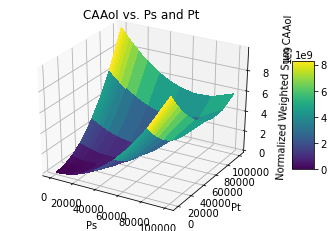

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def calculate_caaol(Ps, Pt):
    # Replace this placeholder calculation with your actual model
    caaol = Ps**2 + Pt**2 - 2*Ps*Pt*np.cos(np.pi/4)
    return caaol


# Define a range of values for Ps and Pt
Ps = np.logspace(-4, 5, 100)
Pt = np.logspace(-4, 5, 100)

# Create a 2D grid of Ps and Pt values
Ps_grid, Pt_grid = np.meshgrid(Ps, Pt)

# Calculate CAAoI for each combination of Ps and Pt
CAAoI_values = np.zeros_like(Ps_grid)
for i in range(len(Ps)):
    for j in range(len(Pt)):
        CAAoI_values[i, j] = calculate_caaol(Ps[i], Pt[j])
        

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(Ps_grid, Pt_grid, CAAoI_values, cmap='viridis',
                       linewidth=0, antialiased=False)

# Set axis labels and title
ax.set_xlabel('Ps')
ax.set_ylabel('Pt')
ax.set_zlabel('Normalized Weighted Sum CAAoI')
ax.set_title('CAAoI vs. Ps and Pt')

# Add a colorbar
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Testing ACO with GA PSO

No of process= 5 No of Devices= 34 No of Drones= 4 Process Group= [[1, 2], [3], [4], [5]]

[0.48318262892847624, 0.5168173710715238, 1.0, 1.0, 1.0]
ACO :: Iteration 0: Best Cost is = 0.6009782479887147
ACO :: Iteration 1: Best Cost is = 0.6009782479887147
ACO :: Iteration 2: Best Cost is = 0.6009782479887147
ACO :: Iteration 3: Best Cost is = 0.6009782479887147
ACO :: Iteration 4: Best Cost is = 0.6009782479887147
ACO :: Iteration 5: Best Cost is = 0.6009782479887147
ACO :: Iteration 6: Best Cost is = 0.6009782479887147
ACO :: Iteration 7: Best Cost is = 0.6009782479887147
ACO :: Iteration 8: Best Cost is = 0.6009782479887147
ACO :: Iteration 9: Best Cost is = 0.6009782479887147
ACO :: Iteration 10: Best Cost is = 0.6009782479887147
ACO :: Iteration 11: Best Cost is = 0.6009782479887147
ACO :: Iteration 12: Best Cost is = 0.6009782479887147
ACO :: Iteration 13: Best Cost is = 0.6009782479887147
ACO :: Iteration 14: Best Cost is = 0.6009782479887147
ACO :: Iteration 15: Best Cost is = 0

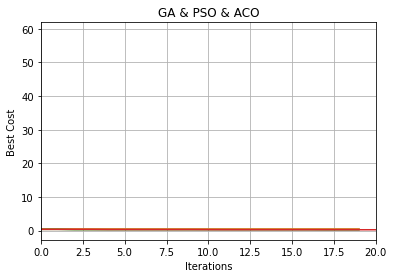

ACO :: Iteration 0: Best Cost is = 0.6802885831690682
ACO :: Iteration 1: Best Cost is = 0.6802885831690682
ACO :: Iteration 2: Best Cost is = 0.6802885831690682
ACO :: Iteration 3: Best Cost is = 0.6802885831690682
ACO :: Iteration 4: Best Cost is = 0.6802885831690682
ACO :: Iteration 5: Best Cost is = 0.6802885831690682
ACO :: Iteration 6: Best Cost is = 0.6802885831690682
ACO :: Iteration 7: Best Cost is = 0.6802885831690682
ACO :: Iteration 8: Best Cost is = 0.6802885831690682
ACO :: Iteration 9: Best Cost is = 0.6802885831690682
ACO :: Iteration 10: Best Cost is = 0.6802885831690682
ACO :: Iteration 11: Best Cost is = 0.6802885831690682
ACO :: Iteration 12: Best Cost is = 0.6802885831690682
ACO :: Iteration 13: Best Cost is = 0.6802885831690682
ACO :: Iteration 14: Best Cost is = 0.6802885831690682
ACO :: Iteration 15: Best Cost is = 0.6802885831690682
ACO :: Iteration 16: Best Cost is = 0.6802885831690682
ACO :: Iteration 17: Best Cost is = 0.6802885831690682
ACO :: Iteration 18:

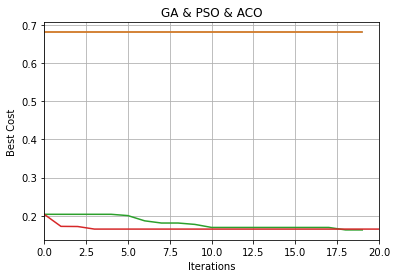

ACO :: Iteration 0: Best Cost is = 0.6517289036490931
ACO :: Iteration 1: Best Cost is = 0.5935273240849305
ACO :: Iteration 2: Best Cost is = 0.5935273240849305
ACO :: Iteration 3: Best Cost is = 0.5935273240849305
ACO :: Iteration 4: Best Cost is = 0.5935273240849305
ACO :: Iteration 5: Best Cost is = 0.5935273240849305
ACO :: Iteration 6: Best Cost is = 0.5935273240849305
ACO :: Iteration 7: Best Cost is = 0.5935273240849305
ACO :: Iteration 8: Best Cost is = 0.5935273240849305
ACO :: Iteration 9: Best Cost is = 0.5935273240849305
ACO :: Iteration 10: Best Cost is = 0.5935273240849305
ACO :: Iteration 11: Best Cost is = 0.5935273240849305
ACO :: Iteration 12: Best Cost is = 0.5935273240849305
ACO :: Iteration 13: Best Cost is = 0.5935273240849305
ACO :: Iteration 14: Best Cost is = 0.5935273240849305
ACO :: Iteration 15: Best Cost is = 0.5935273240849305
ACO :: Iteration 16: Best Cost is = 0.5935273240849305
ACO :: Iteration 17: Best Cost is = 0.5935273240849305
ACO :: Iteration 18:

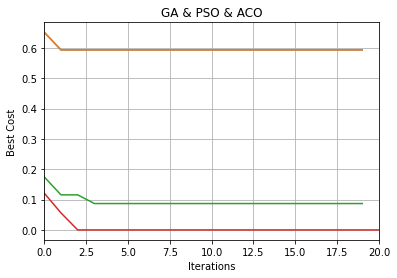

ACO :: Iteration 0: Best Cost is = 0.6351257548020854
ACO :: Iteration 1: Best Cost is = 0.5977835700033054
ACO :: Iteration 2: Best Cost is = 0.5977835700033054
ACO :: Iteration 3: Best Cost is = 0.5977835700033054
ACO :: Iteration 4: Best Cost is = 0.5977835700033054
ACO :: Iteration 5: Best Cost is = 0.5977835700033054
ACO :: Iteration 6: Best Cost is = 0.5977835700033054
ACO :: Iteration 7: Best Cost is = 0.5977835700033054
ACO :: Iteration 8: Best Cost is = 0.5977835700033054
ACO :: Iteration 9: Best Cost is = 0.5977835700033054
ACO :: Iteration 10: Best Cost is = 0.5977835700033054
ACO :: Iteration 11: Best Cost is = 0.5977835700033054
ACO :: Iteration 12: Best Cost is = 0.5977835700033054
ACO :: Iteration 13: Best Cost is = 0.5977835700033054
ACO :: Iteration 14: Best Cost is = 0.5977835700033054
ACO :: Iteration 15: Best Cost is = 0.5977835700033054
ACO :: Iteration 16: Best Cost is = 0.5977835700033054
ACO :: Iteration 17: Best Cost is = 0.5977835700033054
ACO :: Iteration 18:

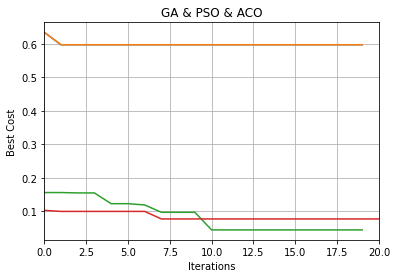

No of process= 5 No of Devices= 34 No of Drones= 4 Process Group= [[1, 2], [3], [4], [5]]
GA :: Average COAOI =  0.1260584669971579
GA :: Number of times Data Collected =  1002
GA :: Total Data Collected =  5010.0  KByte
GA :: Convergence Iteration number  64
GA :: Elaped Time  126.24
Total number of Rows written    205


<ipython-input-3-737f04da1b5b>:37: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet = book.get_sheet_by_name('GA')


saved
PSO :: Average COAOI =  0.10856711120675139
PSO :: Number of times Data Collected =  41
PSO :: Total Data Collected =  205.0  KByte
PSO :: Convergence Iteration number  -37
PSO :: Elaped Time  195.64 -  4.722265005111694 =  190.9177349948883
Total number of Rows written    206


<ipython-input-3-737f04da1b5b>:88: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  sheet = book.get_sheet_by_name('PSO')


saved
ACO :: Average COAOI =  0.6181444313115048
GA :: Number of times Data Collected =  0
GA :: Total Data Collected =  0.0  KByte
GA :: Convergence Iteration number  2
GA :: Elaped Time  0
Total number of Rows written    206
saved


In [3]:
                     ########### VERSION 2   ################### Try to Fix T(time to collect responses) 
                                                                  #and to do that we need to adjust Chromosome size for single, multi drone approach  3 process 12 devices



import matplotlib.pyplot as plt
import random
import math
import numpy as np
from ypstruct import structure
import collections

from xlwt import Workbook
from  xlrd import open_workbook
import openpyxl
from random import *
import random
import sys


############# Helping Functions ####################################
def writeToExcelFile(costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga):
    #define the variables
    rowCount=0
    columnNumber=0
    wb = open_workbook('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    ws = wb.sheet_by_index(0) 
    rowCount = ws.nrows
    rowCount+=1
    columnNumber=1    
    print("Total number of Rows written   ",rowCount)
    writedata(rowCount,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga)

#Data to specified cells.
def writedata(rowNumber,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga):
    book = openpyxl.load_workbook('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    sheet = book.get_sheet_by_name('GA')
    sheet.cell(row=rowNumber, column=1).value = no_drones
    sheet.cell(row=rowNumber, column=2).value = no_process
    sheet.cell(row=rowNumber, column=3).value = no_devices
    sheet.cell(row=rowNumber, column=4).value = PlayTime
    
    sheet.cell(row=rowNumber, column=5).value = problem.T
    sheet.cell(row=rowNumber, column=6).value = params.npop
    sheet.cell(row=rowNumber, column=7).value = params.maxit
    k=8
    for i in range(0,no_drones):
        sheet.cell(row=rowNumber, column=k).value = costofprocess[i]
        k=k+1
        
        
    for i in range(0,5-no_drones):
        sheet.cell(row=rowNumber, column=k).value = .000000000001
        k=k+1
        
    sheet.cell(row=rowNumber, column=13).value = totalcost
    sheet.cell(row=rowNumber, column=14).value = EtaS
    sheet.cell(row=rowNumber, column=15).value = EtaT
    sheet.cell(row=rowNumber, column=16).value = RohS
    sheet.cell(row=rowNumber, column=17).value = RohT
    sheet.cell(row=rowNumber, column=18).value = TotalDataCollected
    sheet.cell(row=rowNumber, column=19).value = TotalDataCollected*2560/1024 * 2 # Expressed in KByte= 2560 Byte for 2 Sec
    sheet.cell(row=rowNumber, column=20).value = convergega
    sheet.cell(row=rowNumber, column=21).value = avgtimeelapedga
    
   
    
    book.save('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    print('saved')

############################################################################################################

def writeToExcelFile2(costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergepso,avgtimeelapedpso):
    #define the variables
    rowCount=0
    columnNumber=0
    wb = open_workbook('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    ws = wb.sheet_by_index(0) 
    rowCount = ws.nrows
    rowCount+=1
    columnNumber=1    
    print("Total number of Rows written   ",rowCount)
    writedata2(rowCount,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergepso,avgtimeelapedpso)

#Data to specified cells.
def writedata2(rowNumber,columnNumber,costofprocess,totalcost,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergepso,avgtimeelapedpso):
    book = openpyxl.load_workbook('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    sheet = book.get_sheet_by_name('PSO')
    sheet.cell(row=rowNumber, column=1).value = no_drones
    sheet.cell(row=rowNumber, column=2).value = no_process
    sheet.cell(row=rowNumber, column=3).value = no_devices
    sheet.cell(row=rowNumber, column=4).value = PlayTime
    
    sheet.cell(row=rowNumber, column=5).value = problem.T
    sheet.cell(row=rowNumber, column=6).value = params.npop
    sheet.cell(row=rowNumber, column=7).value = params.maxit
    k=8
    for i in range(0,no_drones):
        sheet.cell(row=rowNumber, column=k).value = costofprocess[i]
        k=k+1
        
        
    for i in range(0,5-no_drones):
        sheet.cell(row=rowNumber, column=k).value = .000000000001
        k=k+1
        
    sheet.cell(row=rowNumber, column=13).value = totalcost
    sheet.cell(row=rowNumber, column=14).value = EtaS
    sheet.cell(row=rowNumber, column=15).value = EtaT
    sheet.cell(row=rowNumber, column=16).value = RohS
    sheet.cell(row=rowNumber, column=17).value = RohT
    sheet.cell(row=rowNumber, column=18).value = TotalDataCollected
    sheet.cell(row=rowNumber, column=19).value = TotalDataCollected*2560/1024 * 2 # Expressed in KByte= 2560 Byte for 2 Sec
    sheet.cell(row=rowNumber, column=20).value = convergepso
    sheet.cell(row=rowNumber, column=21).value = avgtimeelapedpso
    
  
    book.save('C:\\Users\\sudipkumarde\\All Python Programs\\Age of Information\\Runtimeinfo2.xlsx')
    print('saved')



def distribute(numbers, n):
    quotient, remainder = divmod(len(numbers), n)
    result = [numbers[i * quotient + min(i, remainder):(i + 1) * quotient + min(i + 1, remainder)] for i in range(n)]
    return result

def crossover(parent1, parent2, gamma=0.1):  
    c1=parent1.deepcopy()
    c2=parent2.deepcopy()
    
    p1=c1.position.tolist()
    p2=c2.position.tolist()
    
    for i in range(1,random.randint(2,3)): #number of times you want to do crossover
        
        # select crossover point
        crossover_point = random.randint(1, len(parent1.position) - 1)
    
        # create offspring solution
        c1.position = np.array(p1[:crossover_point] + p2[crossover_point:])
        c2.position = np.array(p2[:crossover_point] + p1[crossover_point:])
        p1=c1.position.tolist()
        p2=c2.position.tolist()
    
    return c1, c2

def mutate2(x, mu):
    y=x.deepcopy()
    count=0
    for swaping_p in range(len(y.position)):
        if(random.random() < mu):
            swapedWith = np.random.randint(0,len(y.position))
            temp1=y.position[swaping_p]
            temp2=y.position[swapedWith]
            y.position[swapedWith]=temp1
            y.position[swaping_p]=temp2
            count=count+1

    return y


def roulette_wheel_selection(p):
    c = np.cumsum(p)
    r = sum(p)*np.random.rand()
    ind = np.argwhere(r <= c)
    return ind[0][0]

def findmindistance(frame,v, allindex,distancematrix):
    L=len(allindex)
    devices=[]
    v1=int(frame[v].device[1:])-1
    
    for j in range(v-1, 0, -1) :
        v2=int(frame[j].device[1:])-1
        
        d=distancematrix[v1][v2]
#         print('v1=',v1,'v2=',v2,'dis ',d)
        devices.append(d)
    if len(devices)>0:
        m=min(devices)
    else:
        m=0
#     print('min=',m)
    return m


def distribute_random_numbers(n):
    # generate n random numbers
    nums = [random.random() for i in range(n)]
    # calculate sum
    nums_sum = sum(nums)
    # normalize the numbers
    nums = [num/nums_sum for num in nums]
    return nums


def makedistancematrix(devloc):
    #devloc={'n1': (253, 434), 'n2': (200, 368), 'n3': (76, 372),'n4': (100, 500),'n5': (173, 635), 'n6': (167, 676),'n7': (451, 687),'n8': (240, 643),'n9': (467, 620), 'n10': (474, 709), 'n11': (505, 594),'n12': (458, 494)}
    #Structure of device location
    dismat=[]
    for i in range(1,no_devices+1):

        temp=[]
        device1="n"+str(i)
        node1=devloc[device1]

        for j in range(1,no_devices+1):

            if i !=j:
                device2="n"+str(j)
                node2=devloc[device2]
                distance=math.dist(node1,node2)
            else:
                distance=0.0
            
            temp.append(distance)

        dismat.append(temp)


    return dismat

def count_consecutive_sequences(lst):
    count = 1
    num_sequences = 0
    current_elem = lst[0]

    for elem in lst[1:]:
        if elem == current_elem:
            count += 1
        else:
            current_elem = elem
            if count > 1:
                num_sequences += 1
            count = 1

    if count > 1:
        num_sequences += 1

    return num_sequences


def findtimedifference(v,frame,allindex):
    currentdevice=frame[v].device
    td=1
    if v-1 <0:
        return td
    for k in range(v-1, 0, -1) :
        loc=allindex[k]
        if frame[loc].device == currentdevice:
            td=frame[v].timestamp - frame[loc].timestamp
            break
    
    return td
            
    
def confirmnorepeat(L, avllist):
    #print("LLLLLL",L)
   
    for ind in range(len(L)-1):
        f=L[ind]
        s=L[ind+1]
        
        if f==s:
            while True:
                ch=random.choice(avllist)
                if ch!=f:
                    break
            
        
            L[ind+1]=ch

    return (L)
    
    
def CalculateMLambda(n):
    # generate n random numbers
    #nums = [random.random() for i in range(n)]
    nums = [random.uniform(0.28, 0.40) for i in range(n)]
    # calculate sum
    nums_sum = sum(nums)
    # normalize the numbers
    nums = [num/nums_sum for num in nums]
    return nums    
    

def generateDeviceLocation(no_devices):
    devlocation={}
    point_history=[]
    for i in range(1,no_devices+1):
        node=str("n"+str(i))
        #print(node)
        while True:
            pntX=randint(1, 1000)
            pntY=randint(1, 1000)
            if (pntX,pntY) not in point_history:
                point_history.append((pntX,pntY))
                devlocation[node]=(pntX,pntY)
                break
    return devlocation

def doDeviceProcessMapping(no_process,no_devices):
    numbers = [i for i in range(1,no_devices+1)]
    #random.shuffle(numbers)
    all_dist_p = distribute(numbers, no_process)
    i=1
    pdmap2={}
    for fr in all_dist_p:
        pr=str("p"+str(i))
        i=i+1
        for nd in fr:
            node=str("n"+str(nd))
            pdmap2[node]=pr
    
    return pdmap2




def findTotalDataGathered(frame,PlayTime):
    count=0
    for i in range(0,len(frame)):
        if frame[i].timestamp <= PlayTime:
            count=count+1
    
    return count
            
def findPositionLocation(position,devicelocation):
    
    PL=[]
    for p in position:
        val=devicelocation[p]
        PL.append(float(val[0]))
        PL.append(float(val[1]))
    return PL
    
    
def findNearestDevice(positionlocation, devicelocation,sets,hm_samevalue):
    dic={}
    pos=[]
    k=0
        
    l=len(positionlocation)
#     print(l)
    for i in range(0,l-1,2):
        x=positionlocation[i]
        y=positionlocation[i+1]
#         print(x,y)
        for nd in sets:
            dist = math.dist((x, y), devicelocation[nd])
            dic[nd]=dist
#             print(dist)
            
#         print(dic)
        sorted_dic = dict(sorted(dic.items(), key=lambda x: x[1]))
        first_key, first_value = next(iter(sorted_dic.items()))
        iterator = iter(sorted_dic.items())

        # Skip the first element
        next(iterator)

        # Retrieve the second element
        second_key, second_value = next(iterator)
#         print(sorted_dic)
#         print(first_key, first_value)
#         print(second_key, second_value)
        
        if k==0:
            pos.append(first_key)
        else:
            lpos=len(pos)
            if pos[lpos-1]==first_key:
                if hm_samevalue>=5:
                    third_key, third_value = next(iterator)
                    fourth_key, fourth_value = next(iterator)
                    randomly_selected_key=random.choice([first_key,second_key,third_key,fourth_key])
                    pos.append(randomly_selected_key)
                else:
                    pos.append(second_key)
            else:
                pos.append(first_key)
        k=k+1
#     print(pos)
    return pos
        
        
# Start measuring time elapsed
def tic():
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

# End mesuring time elapsed
def toc():
    import time, math
    if 'startTime_for_tictoc' in globals():
        dt = math.floor(100*(time.time() - startTime_for_tictoc))/100.
        print('Elapsed time is {} second(s).'.format(dt))
        return dt
    else:
        print('Start time not set. You should call tic before toc.')    
        

def count_same_values_from_right(lst):
    count = 0
    last_element = lst[-1]

    # Iterate through the list from right to left
    for i in range(len(lst) - 1, -1, -1):
        if lst[i] == last_element:
            count += 1
        else:
            break

    return count  
    
    
    

############# Helping Functions End ####################################


###############################################################################
#             PSO Algorithm starts
###############################################################################

def PSOrun(problem, params,d,initialpop,ga_aoi):
    import time
    extra_time=0
    # Problem Information
    costfunc = problem.costfunc
    nvar = problem.nvar               #particle's size
    nVar=nvar
    no_process=problem.no_process     # No of process
    no_devices=problem.no_devices     # No of devices that monoitors all process
    pdmap=problem.pdmap               # Device to Process mapping {'n1':p1, 'n2':p2, ....}
    dismat=problem.distancematrix     # Distance matrix(device X device) which holds distances
    devicelocation=problem.devicelocation 

    allsets=problem.allsets #Set of nodes assigned to drones [[3,5,9],[8,1,2]]  3,5,9 nodes is assigned to drone 1

    #BufferTime BT
    BT=1

    # Parameters
    maxit = params.MaxIter
    npop = params.PopSize
    c1 = params.c1
    c2 = params.c2
    w = params.w
    wdamp = params.wdamp
    

    # Empty Individual Particle Template
    
    empty_individual = structure()
    empty_individual.position = None
    empty_individual.positionlocation = None
    empty_individual.velocity = None
    empty_individual.cost = None
    empty_individual.dataCollected=None
    empty_individual.best_position=None
    empty_individual.best_positionlocation=None
    empty_individual.best_cost=None

#     Best Solution Ever Found
    bestsol = empty_individual.deepcopy()
    bestsol.cost = np.inf

    # Initialize Best Solution Ever Found
    gbest = empty_individual.deepcopy()
    gbest.position = None
    gbest.positionlocation = None
    gbest.cost = np.inf

    # Create Initial Population
    pop = empty_individual.repeat(npop)
    hm_samevalue=0
    for i in range(npop):
#         pos=[]
#         for k in range(1,nvar+1):
#             pos.append(random.choice(allsets[d]))
          
#         pos=confirmnorepeat(pos,allsets[d])
#         pop[i].position = np.array(pos)
        pop[i].position=initialpop[i].position
    
        posloc=findPositionLocation(pop[i].position,devicelocation)
        
        pop[i].positionlocation=np.array(posloc)
        
        pop[i].velocity = np.zeros(nvar*2)
        
        RV = costfunc(pop[i].position)
        pop[i].cost = RV.costvalue
        pop[i].dataCollected=nvar-RV.dataignored
        
        
        pop[i].best_position = pop[i].position.copy()
        pop[i].best_positionlocation = pop[i].positionlocation.copy()
        pop[i].best_cost = pop[i].cost
        
        if pop[i].best_cost < gbest.cost:
            gbest.position = pop[i].best_position.copy()
            gbest.positionlocation = pop[i].best_positionlocation.copy()
            gbest.cost = pop[i].best_cost
    
    
    # To store Best Cost of all Iterations
    bestcost = np.empty(maxit*3)
    
    prev_gbest_cost    =gbest.cost
    
    # PSO Loop
    for it in range(0, maxit*3):
        for i in range(0, npop):
            
#             pop[i].velocity = w*pop[i].velocity \
#                 + c1*np.random.rand(nVar)*(pop[i].best_position - pop[i].position) \
#                 + c2*np.random.rand(nVar)*(gbest.position - pop[i].position)
            
            pop[i].velocity = w*pop[i].velocity \
                + c1*np.random.rand(nVar*2)*(pop[i].best_positionlocation - pop[i].positionlocation) \
                + c2*np.random.rand(nVar*2)*(gbest.positionlocation - pop[i].positionlocation)



            
            pop[i].positionlocation += pop[i].velocity
#             pop[i].positionlocation = np.maximum(pop[i].positionlocation, varmin)
#             pop[i].positionlocation = np.minimum(pop[i].positionlocation, varmax)
            
            
            start_time1 = time.time()
            pos=findNearestDevice(pop[i].positionlocation, devicelocation,allsets[d],hm_samevalue)
            pop[i].position=np.array(pos)
            
            #Added these lines to test { Starts
            posloc=findPositionLocation(pop[i].position,devicelocation)
            pop[i].positionlocation=np.array(posloc)
            #Added these lines to test } Ends
            end_time1 = time.time()
            time_difference1 = end_time1 - start_time1
            extra_time=extra_time+time_difference1

                
            
            RV = costfunc(pop[i].position)
            pop[i].cost = RV.costvalue
            pop[i].dataCollected=nvar-RV.dataignored
            
            
            
            if pop[i].cost < pop[i].best_cost:
                pop[i].best_position = pop[i].position.copy()
                pop[i].best_positionlocation = pop[i].positionlocation.copy()
                pop[i].best_cost = pop[i].cost

                if pop[i].best_cost < gbest.cost:
                    gbest.position = pop[i].best_position.copy()
                    gbest.positionlocation = pop[i].best_positionlocation.copy()
                    gbest.cost = pop[i].best_cost

        w *= wdamp
        print('PSO :: Iteration {}: Best Cost = {}'.format(it, gbest.cost))
        # Store Best Cost
        bestcost[it] = gbest.cost
        if gbest.cost <= ga_aoi:
            break
        if prev_gbest_cost == gbest.cost:
            hm_samevalue=hm_samevalue+1
        else:
            prev_gbest_cost = gbest.cost
            hm_samevalue=0

    # Output
#     out = structure()
#     out.pop = pop
#     out.bestsol = bestsol
#     out.bestcost = bestcost
    
    
    out = structure()
    out.pop = pop
    out.bestsol = gbest
    out.bestcost = bestcost
    out.extra_time=extra_time
    print(extra_time)
    return out

######################## ACO#######################

###############################################################################
#             ACO Algorithm starts (Ant Colony Optimization)
###############################################################################

def ACO_run(problem, params_aco, d):
    costfunc = problem.costfunc
    nvar = problem.nvar
    no_devices = problem.no_devices
    devicelocation = problem.devicelocation
    allsets = problem.allsets

    # ACO Parameters
    n_ants = params_aco.nants
    maxit = params_aco.maxit
    alpha = params_aco.alpha      # pheromone importance
    beta = params_aco.beta        # heuristic importance
    rho = params_aco.rho          # pheromone evaporation rate
    Q = params_aco.Q              # pheromone deposit coefficient

    # Initialize pheromone matrix for device transitions (size: allsets[d] devices)
    devices = [int(nd[1:]) - 1 for nd in allsets[d]]
    num_devices = len(devices)
    pheromone = np.ones((no_devices, no_devices))
    eta = np.zeros((no_devices, no_devices))
    for i in range(no_devices):
        for j in range(no_devices):
            if problem.distancematrix[i][j] != 0:
                eta[i][j] = 1.0 / problem.distancematrix[i][j]
            else:
                eta[i][j] = 1e-6  # Small value to prevent division by zero

    # Ant structure
    empty_ant = structure()
    empty_ant.position = None
    empty_ant.cost = None
    empty_ant.dataCollected = None

    bestsol = empty_ant.deepcopy()
    bestsol.cost = np.inf

    bestcost = np.empty(maxit)

    for it in range(maxit):
        ants = empty_ant.repeat(n_ants)
        for k in range(n_ants):
            visited = []
            available = set(devices)
            if not available:
                break
            # Randomly choose the starting device
            curr_idx = random.choice(list(available))
            visited.append(curr_idx)
            available.remove(curr_idx)
            while len(visited) < nvar:
                probs = np.zeros(no_devices)
                for j in available:
                    probs[j] = (pheromone[curr_idx][j] ** alpha) * (eta[curr_idx][j] ** beta)
                if np.sum(probs) == 0 or len(available) == 0:
                    next_idx = random.choice(list(available)) if available else curr_idx
                else:
                    probs = probs / np.sum(probs)
                    # Only sample among available nodes
                    av_l = np.array(list(available))
                    av_probs = np.array([probs[j] for j in av_l])
                    av_probs = av_probs / np.sum(av_probs)
                    next_idx = np.random.choice(av_l, p=av_probs)
                visited.append(next_idx)
                if next_idx in available:
                    available.remove(next_idx)
                curr_idx = next_idx
            # If more positions needed, fill randomly
            while len(visited) < nvar:
                next_idx = random.choice(devices)
                visited.append(next_idx)
            pos_label = ['n' + str(idx+1) for idx in visited]
            ants[k].position = np.array(pos_label)
            RV = costfunc(ants[k].position)
            ants[k].cost = RV.costvalue
            ants[k].dataCollected = nvar - RV.dataignored
            if ants[k].cost < bestsol.cost:
                bestsol = ants[k].deepcopy()
        # Pheromone update
        pheromone = pheromone * (1 - rho)
        for ant in ants:
            for i in range(len(ant.position) - 1):
                idx1 = int(ant.position[i][1:]) - 1
                idx2 = int(ant.position[i+1][1:]) - 1
                pheromone[idx1][idx2] += Q / (ant.cost + 1e-10)
        bestcost[it] = bestsol.cost
        print("ACO :: Iteration {}: Best Cost is = {}".format(it, bestcost[it]))

    out = structure()
    out.pop = ants
    out.bestsol = bestsol
    out.bestcost = bestcost
    return out

    

############# Helping Functions End ####################################


###############################################################################
#             GA Algorithm starts
###############################################################################

def run(problem, params,d):
    
    # Problem Information
    costfunc = problem.costfunc
    nvar = problem.nvar          #chromosome size
    no_process=problem.no_process     # No of process
    no_devices=problem.no_devices     # No of devices that monoitors all process
    pdmap=problem.pdmap               # Device to Process mapping {'n1':p1, 'n2':p2, ....}
    dismat=problem.distancematrix     # Distance matrix(device X device) which holds distances

    allsets=problem.allsets #Set of nodes assigned to drones [[3,5,9],[8,1,2]]  3,5,9 drone is assigned to drone 1

    #BufferTime BT
    BT=1

    # Parameters
    maxit = params.maxit
    npop = params.npop
    beta = params.beta
    pc = params.pc
    nc = int(np.round(pc*npop/2)*2)
    gamma = params.gamma
    mu = params.mu
    sigma = params.sigma

    # Empty Individual Template
    empty_individual = structure()
    empty_individual.position = None
    empty_individual.cost = None
    empty_individual.dataCollected=None

    # Best Solution Ever Found
    bestsol = empty_individual.deepcopy()
    bestsol.cost = np.inf

    # Initialize Population
    pop = empty_individual.repeat(npop)
    initialpop=empty_individual.repeat(npop)
    
    for i in range(npop):
 
        pos=[]
        for k in range(1,nvar+1):
            pos.append(random.choice(allsets[d]))
            
        pos=confirmnorepeat(pos,allsets[d])
               
        pop[i].position = np.array(pos)
        initialpop[i].position=np.array(pos)
        #pop[i].cost = costfunc(pop[i].position)
        RV = costfunc(pop[i].position)
        pop[i].cost = RV.costvalue
        pop[i].dataCollected=nvar-RV.dataignored
        
        if pop[i].cost < bestsol.cost:
            bestsol = pop[i].deepcopy()

    # Best Cost of Iterations
    bestcost = np.empty(maxit)
    
    # Main Loop
    for it in range(maxit):

        costs = np.array([x.cost for x in pop])
        avg_cost = np.mean(costs)
#         if avg_cost != 0:
#             costs = costs/avg_cost
        
        costs = costs/(avg_cost+1)
        probs = np.exp(-beta*costs)

        popc = []                            # child population
        for _ in range(nc//2):


#             # Perform Roulette Wheel Selection
            p1 = pop[roulette_wheel_selection(probs)]
            p2 = pop[roulette_wheel_selection(probs)]

            # Perform Crossover
            c1, c2 = crossover(p1, p2, gamma)

            # Perform Mutation
#             c1 = mutate(c1, mu, sigma)
#             c2 = mutate(c2, mu, sigma)
            # Perform Mutation
            c1 = mutate2(c1, mu)
            c2 = mutate2(c2, mu)
            c1.position=confirmnorepeat(c1.position,allsets[d])
            c2.position=confirmnorepeat(c2.position,allsets[d])


            # Evaluate First Offspring
            #c1.cost = costfunc(c1.position)
            RV = costfunc(c1.position)
            c1.cost = RV.costvalue
            c1.dataCollected=nvar-RV.dataignored
            
            if c1.cost < bestsol.cost:
                bestsol = c1.deepcopy()

            # Evaluate Second Offspring
            #c2.cost = costfunc(c2.position)
            
            RV = costfunc(c2.position)
            c2.cost = RV.costvalue
            c2.dataCollected=nvar-RV.dataignored
            
            if c2.cost < bestsol.cost:
                bestsol = c2.deepcopy()

            # Add Offsprings to popc
            popc.append(c1)
            popc.append(c2)
        

        # Merge, Sort and Select
        pop += popc
        pop = sorted(pop, key=lambda x: x.cost)
        pop = pop[0:npop]

        # Store Best Cost
        bestcost[it] = bestsol.cost

        # Show Iteration Information
        print("GA :: Iteration {}: Best Cost is = {}".format(it, bestcost[it]))

    # Output
    out = structure()
    out.pop = pop
    out.bestsol = bestsol
    out.bestcost = bestcost
    out.initialpop=initialpop
    return out


       
    
gcount=1   

def AoICostFunction(x):    #x is the position of the gene in chromosomes [ n1,n3,n5,n7 .....]

    node= structure()
    node.k=None
    node.process=None
    node.device=None
    node.hovertime=0
    node.buffertime=0
    node.timestamp=0
    node.communtime=0
    node.receivetime=0
    node.updateno=None
    frame = node.repeat(len(x)) # it holds Sequence of node visited by UAV
#     for i in range(0,len(x)-1):
#         print(x[i],", ",end='')
    
    hoverdistance=[0.0]
    for i in range(0,len(x)-1):
        v1=x[i]         
        v1=v1[1:]
        v1=int(v1)
        v1=v1-1
        
        v2=x[i+1]
        v2=v2[1:]
        v2=int(v2)
        v2=v2-1
        #print('v1= ',v1, 'V2= ',v2)
        d=distancematrix[v1][v2]
        hoverdistance.append(d)
        
 
    #Calculate cost of frame
    no_of_unique_process={deviceprocessmap[x[0]]}
    oldreceivetime=0
    index=0
    for f in frame:
        f.device=x[index]
        #print("ddddddddddevice",f.device)
        key=f.device
        f.process=deviceprocessmap[key]   #finds the process which is monitored by device, key
        no_of_unique_process.add(f.process)
        #dronespeed=2
        f.hovertime= hoverdistance[index] / dronespeed      # hovering time
        #f.bufferedtime= random.randint(0, 10**5)/ 10**5
        f.bufferedtime= 0
        f.timestamp=oldreceivetime+f.hovertime+f.bufferedtime
        f.communtime=0.06481694493662243
        f.receivetime=f.timestamp+f.communtime
        oldreceivetime=f.receivetime
        #print("[",f.process,f.device,",",round(f.timestamp,3),"]",end="")
        index=index+1
    
        
    #for each Process calculate CAAoI
    #T=frame[index-1].receivetime
    
    #print("Last time stamp ",T," But Play Time=",PlayTime," No of processes ",no_of_unique_process)
    #T=500*len(no_of_unique_process)*4
    
    T=PlayTime
    
    allsum=0
    dataignored=0
    for k in range(1,no_process+1):
        
        process="p"+str(k)
        
        allindex=[]
        #find the index position where this "process" is found in the frame
        index=0
        for f in frame:
            if f.process==process:
                allindex.append(index)
                f.updateno=index+1
            index=index+1
        #Visit all frame position where "process" is found
        #print("K= ",k," process= ",process,' No of updates found =',len(allindex))
        if len(allindex)==0:
            #print('So ignoring process = ',process)
            continue
        sum=0
        kount=1
        for v in range(len(allindex)-1, 0, -1) :
            
            j=allindex[v]         #frame position where "process" is found
            j2=allindex[v-1]      #frame position where previous events of "process" is found
            
            
            
#             alpha=random.uniform(0.35, 0.49)
#             alpha=1
#             if kount%2==1:
#                 alpha=.5
#             else:
#                 alpha=.4
#             kount=kount+1
#             print('alpha = ',alpha)
           
            if v==index-1:
                alpha=1
            else:
                #djdot= findmindistance(frame,v, allindex,distancematrix)  #current distance - last distance
                v1=frame[j].device         
                v1=v1[1:]
                v1=int(v1)
                v1=v1-1
        
                v2=frame[j2].device
                v2=v2[1:]
                v2=int(v2)
                v2=v2-1
                #print('v1= ',v1, 'V2= ',v2)
                djdot=distancematrix[v1][v2]
                
                tjdot=frame[j].timestamp-frame[j2].timestamp
                #tjdot=findtimedifference(v,frame,allindex)  # the time difference between the current update and the last update about pk from the same device.1
                #EtaS=1
                #EtaT=0
                #RohS=1000
                #RohT=100
                
                Es=EtaS
                Et=EtaT
                Ps=RohS
                Pt=RohT
                
                alpha=1-((Es+Et)/(Es*djdot/Ps+ Et*tjdot/Pt+Es*Et+1))

                #print('alpha = ',alpha,' dj=',djdot, 'tj= ',tjdot)
                
            lasttimestamp=frame[j].timestamp
            lastreceivetime=frame[j].receivetime
            prevtimestamp=frame[j2].timestamp
            
#             c1=alpha*(lasttimestamp-prevtimestamp)*(T-lastreceivetime)
#             c1=alpha*(lasttimestamp-prevtimestamp)*(T-2)
#             c1=alpha*(lasttimestamp-prevtimestamp)*(T-lasttimestamp)  #sandip da 
            c1=alpha*(lasttimestamp-prevtimestamp)*(T-2)  #sandip da 
            if frame[j].timestamp > PlayTime:
                #print(frame[j2].timestamp)
                
                c1=0
            sum=sum+c1
        c2=T/2-sum/T           #Eq 10
        #print('process= ',process,' Aoi= ',c2)
        c3=mlambda[k-1] * c2
        allsum=allsum+c3
#         allsum=c2
    
    costvalue=allsum/(.5*T)
    #costvalue=allsum

    
        
    #return random.random()
#     if costvalue<0:
#         return 99999999

    dataignored=0
    for i in range(0,len(frame)):
        if frame[i].timestamp > PlayTime:
            dataignored=dataignored+1
            
    
#     print("Last timestamp considered= ",frame[120-dataignored-1].timestamp)
    returnValues=structure()
    returnValues.dataignored=dataignored
    returnValues.costvalue=costvalue
    
    return returnValues
    #return costvalue



########### INITIALIZE ##########

extra_time=0
# A typical fixed-wing drone flies at a minimum speed of 12 meters per second (m/s), and typically a fast shutter speed is 1/1000 of a second.
dronespeed=12  #12 m / second

plocations = {'p1':(100,400),'p2':(200,630),'p3':(450,650)}


no_drones=4
no_process=5
no_devices=34

EtaS=1               #  EtaS=1 EtaT=0    means Correlational
EtaT=0               #  EtaS=0 EtaT=0    means Conventional
RohS=1000
RohT=1000


#mlambda=[.40,.35,.25]
# mlambda=[.333,.333,.333]
mlambda=[1,1,1]

PlayTime=600       #Time to hover the drone

# Problem Definition
problem = structure()
problem.costfunc = AoICostFunction   #CostFunction
problem.T=40*(no_drones+1)+40        #chromosome size
problem.no_process=no_process   
problem.no_devices=no_devices
problem.nvar = problem.T

# problem.devicelocation={'n1': (253, 434), 'n2': (200, 368), 'n3': (76, 372),'n4': (100, 500), 
#                         'n5': (173, 635), 'n6': (167, 676),'n7': (451, 687),'n8': (240, 643),
#                         'n9': (467, 620), 'n10': (474, 709), 'n11': (505, 594),'n12': (458, 494)}

problem.devicelocation=generateDeviceLocation(no_devices)
#print("decice location    ", devicelocation)   


problem.distancematrix=makedistancematrix(problem.devicelocation)
distancematrix=problem.distancematrix

problem.pdmap=doDeviceProcessMapping(no_process,no_devices)
#print("Process device map ", pdmap)
      
deviceprocessmap=problem.pdmap

############################## ACO ################################
params_aco = structure()
params_aco.nants = 15      # Number of ants
params_aco.maxit = 20      # Number of iterations
params_aco.alpha = .8     # Pheromone importance
params_aco.beta = 1.2      # Heuristic importance
params_aco.rho = 0.3       # Evaporation rate
params_aco.Q = 1           # Deposit factor


##################################################################333

######################################################################################
# GA Parameters
######################################################################################

params = structure()
params.maxit = 20   #Set maximum iteration
params.npop = 15   # Set number of population you want to create

#Although there is some tendency to use crossover rate on level 0.7-0.9 and mutation on 0.1-0.3 it really depends. 
params.beta = 1
params.pc = 1
params.gamma = 0.1
params.mu = 0.1
params.sigma = 0.1

######################################################################################
######################################################################################
######################################################################################
# PSO Parameters
######################################################################################

params2 = structure()
params2.MaxIter = 20   #Set maximum iteration
params2.PopSize = 15   # Set number of population you want to create

params2.c1 = 1.5
params2.c2 = 2
params2.w = .75
params2.wdamp = 0.995



######################################################################################
######################################################################################

numbers = [i for i in range(1,no_process+1)]
all_dist_process = distribute(numbers, no_drones)
print("No of process=",no_process,"No of Devices=",no_devices,"No of Drones=", no_drones,"Process Group=", all_dist_process)
print()


allsets=[]
for adp in all_dist_process:
    d=[]
    for p in adp:
        pr="p"+str(p)
        d2=[k for k,v in problem.pdmap.items() if v== pr] # collecting all nodes of a "pr" process
        d=d+d2
       
    allsets.append(d) # adding all nodes of various process monitored by a drone 
        
problem.allsets=allsets  # contains all devices group by monitored drones

######################################################################################
######################################################################################
khelasum=0
khelasum2=0
khelasum3=0
mlambda=[]

for i in range(0,len(all_dist_process)):
    
    mprocess=len(all_dist_process[i])
    l2=CalculateMLambda(mprocess)
    for j in range(0,len(l2)):
        mlambda.append(l2[j])
        
    
print(mlambda)

costofprocess=[]
costofprocess2=[]
costofprocess3=[]
TotalDataCollected=0
TotalDataCollected2=0
TotalDataCollected3=0

convergega=0
convergepso=0
convergeaco=0

avgtimeelapedga=0
avgtimeelapedpso=0
avgtimeelapedaco=0




for i in range(0,no_drones):
    
    ############# added for ACO  ##################
  
    tic()
  
    out_aco = ACO_run(problem, params_aco, i)
    ttt = toc()
    print('ACO Drone ', i, ' Collected data= ', out_aco.pop[0].dataCollected)
    plt.plot(out_aco.bestcost)
    
    khelasum3=khelasum3+min(out_aco.bestcost)
    costofprocess3.append(min(out_aco.bestcost))
    print("khelasum= ",khelasum3)
    
    ####To count how fast it is converged, I am trying count number of times same best values
    # are recorded. Then from total iteration I will deduct the count value an i will get the 
    # needed iteration number to converge
    
    ccc=count_same_values_from_right(out_aco.bestcost)
    convergeaco=convergeaco+(params_aco.maxit-ccc)
    
    # Results
    #print('variables value',out.pop[0]['position'])
    print('Number of consecutive same sequence = ',count_consecutive_sequences(out_aco.pop[0]['position']))
    dataCollected=out_aco.pop[0]['dataCollected']
    TotalDataCollected3=TotalDataCollected3+dataCollected
    print('ACO Drone ',i,' Collected data= ',dataCollected)
    plt.plot(out_aco.bestcost)
    
    
    #############################################
    
    # Run GA
    #startTime_for_tictoc = time.time()
    tic()
    out = run(problem, params,i)
    #ttt=math.floor(100*(time.time() - startTime_for_tictoc))/100.
    ttt=toc()
    avgtimeelapedga=avgtimeelapedga+ttt
#     khelasum=khelasum+out.bestcost[0]
#     costofprocess.append(out.bestcost[0])
    khelasum=khelasum+min(out.bestcost)
    costofprocess.append(min(out.bestcost))
    print("khelasum= ",khelasum)
    
    ####To count how fast it is converged, I am trying count number of times same best values
    # are recorded. Then from total iteration I will deduct the count value an i will get the 
    # needed iteration number to converge
    
    ccc=count_same_values_from_right(out.bestcost)
    convergega=convergega+(params.maxit-ccc)
    
    ##Converge count end
    
    # Results
    #print('variables value',out.pop[0]['position'])
    print('Number of consecutive same sequence = ',count_consecutive_sequences(out.pop[0]['position']))
    dataCollected=out.pop[0]['dataCollected']
    TotalDataCollected=TotalDataCollected+dataCollected
    print('GA Drone ',i,' Collected data= ',dataCollected)
    plt.plot(out.bestcost)
    
    # Run PSO
    initialpop=out.initialpop
    #startTime_for_tictoc = time.time()
    tic()
    ga_aoi=min(out.bestcost)
    
    out = PSOrun(problem, params2,i,initialpop,ga_aoi)
    #ttt=math.floor(100*(time.time() - startTime_for_tictoc))/100.
    ttt=toc()
    avgtimeelapedpso=avgtimeelapedpso+ttt
    extra_time=extra_time+out.extra_time
#     khelasum=khelasum+out.bestcost[0]
#     costofprocess.append(out.bestcost[0])
    khelasum2=khelasum2+min(out.bestcost)
    costofprocess2.append(min(out.bestcost))
    print("khelasum= ",khelasum2)
    
    ####To count how fast it is converged, I am trying count number of times same best values
    # are recorded. Then from total iteration I will deduct the count value an i will get the 
    # needed iteration number to converge
    
    ccc=count_same_values_from_right(out.bestcost)
    convergepso=convergepso+(params2.MaxIter-ccc)
    
    ##Converge count end
    
    
    # Results
    #print('variables value',out.pop[0]['position'])
    print('Number of consecutive same sequence = ',count_consecutive_sequences(out.pop[0]['position']))
    dataCollected=out.pop[0]['dataCollected']
    TotalDataCollected2=TotalDataCollected2+dataCollected
    print('PSO Drone ',i,' Collected data= ',dataCollected)
    plt.plot(out.bestcost)
    
    plt.xlim(0, params_aco.maxit)
    plt.xlabel('Iterations')
    plt.ylabel('Best Cost')
    plt.title('GA & PSO & ACO')
    plt.grid(True)
    plt.show()
    
    #############################################
    
  
print("No of process=",no_process,"No of Devices=",no_devices,"No of Drones=", no_drones,"Process Group=", all_dist_process)
avgAoI=khelasum/len(all_dist_process)
avgAoI2=khelasum2/len(all_dist_process)
avgAoI3=khelasum3/len(all_dist_process)

print("GA :: Average COAOI = ", avgAoI)  
print("GA :: Number of times Data Collected = ",TotalDataCollected)
print("GA :: Total Data Collected = ",TotalDataCollected*2560/1024*2," KByte")
print("GA :: Convergence Iteration number ",convergega)
print("GA :: Elaped Time ",avgtimeelapedga)
writeToExcelFile(costofprocess,avgAoI,EtaS,EtaT,RohS,RohT,TotalDataCollected,convergega,avgtimeelapedga)


print("PSO :: Average COAOI = ", avgAoI2)  
print("PSO :: Number of times Data Collected = ",TotalDataCollected2)
print("PSO :: Total Data Collected = ",TotalDataCollected2*2560/1024*2," KByte")
print("PSO :: Convergence Iteration number ",convergepso)
print("PSO :: Elaped Time ",avgtimeelapedpso,"- ",extra_time,"= ",avgtimeelapedpso-extra_time)
writeToExcelFile2(costofprocess2,avgAoI2,EtaS,EtaT,RohS,RohT,TotalDataCollected2,convergepso,avgtimeelapedpso-extra_time)

print("ACO :: Average COAOI = ", avgAoI3)  
print("GA :: Number of times Data Collected = ",TotalDataCollected3)
print("GA :: Total Data Collected = ",TotalDataCollected3*2560/1024*2," KByte")
print("GA :: Convergence Iteration number ",convergeaco)
print("GA :: Elaped Time ",avgtimeelapedaco)
writeToExcelFile(costofprocess3,avgAoI3,EtaS,EtaT,RohS,RohT,TotalDataCollected3,convergeaco,avgtimeelapedaco)



